# **K-means ++**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plot
from scipy import stats

df_song = pd.read_csv('/content/drive/MyDrive/255_datasets/songs_metrics.csv')

# usecols=['energy', 'dance', 'liveness', 'valence', 'tempo', 'instrumental', 'acoustic']

df_song.head()


Unnamed: 0   id                                              songs  \
0         0.0  0.0                                     Too Good Drake   
1         1.0  0.0  Trust Nobody Selena Gomez Tory Lanez Cashmere Cat   
2         5.0  1.0                                New level asap ferg   
3         6.0  2.0                             Fireproof Coleman Hell   
4         8.0  2.0            This Girl Kungs vs Cookin' on 3 Burners   

                                                song        artist  energy  \
0                                           Too Good         Drake   0.641   
1     Trust Nobody (feat. Selena Gomez & Tory Lanez)  Cashmere Cat   0.625   
2                                          New Level     A$AP Ferg   0.655   
3                                          Fireproof  Coleman Hell   0.774   
4  This Girl (Kungs Vs. Cookin' On 3 Burners) - K...         Kungs   0.717   

   dance  liveness  valence    tempo  instrumental  acoustic  popularity  \
0  0.820     0.102    0.395  117.974      0.000051    0.0662        77.0   
1  0.490     0.118    0.748   78.762      0.000000    0.4970        66.0   
2  0.526     0.116    0.156  121.127      0.000000    0.0566        65.0   
3  0.692     0.141    0.771  128.033      0.000010    0.0149        47.0   
4  0.792     0.226    0.466  121.985      0.000036    0.0927        80.0   

                                              genres  
0  ['canadian hip hop', 'canadian pop', 'hip hop'...  
1  ['dance pop', 'downtempo', 'edm', 'electropop'...  
2  ['hip hop', 'pop', 'pop rap', 'rap', 'southern...  
3  ['canadian pop', 'indie poptimism', 'modern al...  
4  ['deep tropical house', 'edm', 'pop', 'tropica...

In [3]:
#get a count of null values
df_song.isnull().sum()

Unnamed: 0      0
id              0
songs           0
song            0
artist          0
energy          0
dance           0
liveness        0
valence         0
tempo           0
instrumental    0
acoustic        0
popularity      0
genres          0
dtype: int64

In [4]:
#remove null values
features = ['energy', 'dance', 'liveness', 'valence', 'tempo', 'instrumental', 'acoustic']

df_song = df_song.dropna(subset=features)


# Remove outliers
z_scores = np.abs(stats.zscore(df_song[features]))
filtered_entries = (z_scores < 3).all(axis=1)
df_song = df_song[filtered_entries]


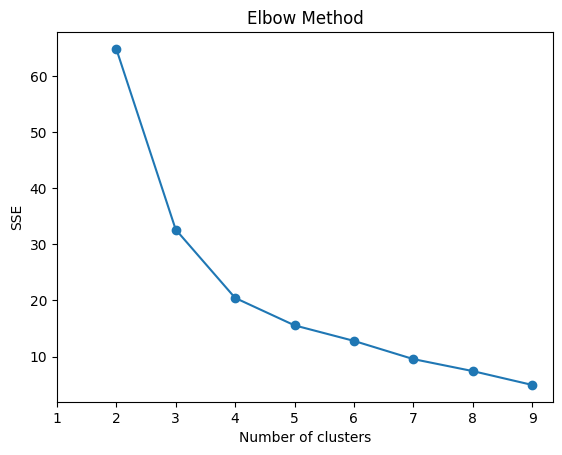

Optimum k = 4


Unnamed: 0   id                                              songs  \
0         0.0  0.0                                     Too Good Drake   
1         1.0  0.0  Trust Nobody Selena Gomez Tory Lanez Cashmere Cat   
2         5.0  1.0                                New level asap ferg   
3         6.0  2.0                             Fireproof Coleman Hell   
4         8.0  2.0            This Girl Kungs vs Cookin' on 3 Burners   

                                                song        artist  energy  \
0                                           Too Good         Drake   0.641   
1     Trust Nobody (feat. Selena Gomez & Tory Lanez)  Cashmere Cat   0.625   
2                                          New Level     A$AP Ferg   0.655   
3                                          Fireproof  Coleman Hell   0.774   
4  This Girl (Kungs Vs. Cookin' On 3 Burners) - K...         Kungs   0.717   

   dance  liveness  valence    tempo  instrumental  acoustic  popularity  \
0  0.820     0.102    0.395  117.974      0.000051    0.0662        77.0   
1  0.490     0.118    0.748   78.762      0.000000    0.4970        66.0   
2  0.526     0.116    0.156  121.127      0.000000    0.0566        65.0   
3  0.692     0.141    0.771  128.033      0.000010    0.0149        47.0   
4  0.792     0.226    0.466  121.985      0.000036    0.0927        80.0   

                                              genres  Cluster  
0  ['canadian hip hop', 'canadian pop', 'hip hop'...        3  
1  ['dance pop', 'downtempo', 'edm', 'electropop'...        0  
2  ['hip hop', 'pop', 'pop rap', 'rap', 'southern...        0  
3  ['canadian pop', 'indie poptimism', 'modern al...        3  
4  ['deep tropical house', 'edm', 'pop', 'tropica...        3

In [5]:

#select the features for clustering
song_feature = df_song[features]

#mormalize the features
scaler = StandardScaler()
song_feature_normalised = scaler.fit_transform(song_feature[features])


# Dimensionality reduction with PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(song_feature_normalised)


#number of clusters using the Elbow method
sse = [] #sum of squared error
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++', n_init=10)
    kmeans.fit(principal_components)
    sse.append(kmeans.inertia_)

#Elbow graph
plot.plot(range(2, 10), sse, marker='o')
plot.title('Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('SSE')
plot.xticks(range(1, 10))
plot.show()

print("Optimum k = 4")

kmeans = KMeans(n_clusters=4,init='k-means++', n_init=10)
df_song['Cluster'] = kmeans.fit_predict(song_feature_normalised)

df_song.head()

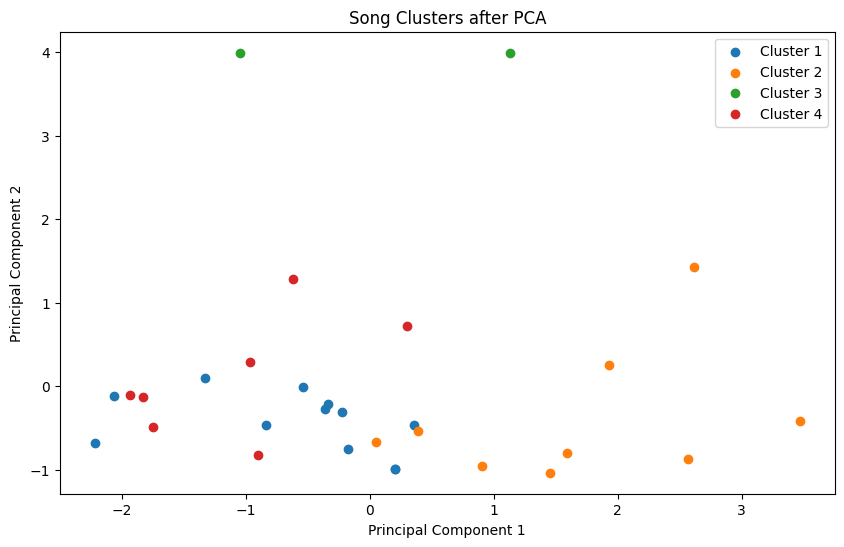

In [6]:
# Plotting the clusters
plot.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = principal_components[df_song['Cluster'] == cluster]
    plot.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}')
plot.title('Song Clusters after PCA')
plot.xlabel('Principal Component 1')
plot.ylabel('Principal Component 2')
plot.legend()
plot.show()

# **EDA**

In [7]:
import numpy as np
import seaborn as sb

df = pd.read_csv('/content/drive/MyDrive/255_datasets/survey.csv')


df = df.drop('Timestamp', axis =1)
df.head()


Age  Gender  Listening_Frequency_s1  Stress_Level_Before_s1  \
0   35    Male                       6                       6   
1   28  Female                       6                       6   
2   15    Male                       5                       5   
3   17  Female                       7                       5   
4   20    Male                       5                       4   

   Stress_Level_After_s1  Anxiety_Level_Before_s1  Anxiety_Level_After_s1  \
0                      1                        6                       2   
1                      1                        5                       4   
2                      2                        5                       1   
3                      3                        6                       5   
4                      3                        3                       2   

   Depression_Level_Before_s1  Depression_Level_After_s1  \
0                           5                          4   
1                           6                          5   
2                           5                          4   
3                           7                          6   
4                           3                          4   

  Listening_conditions_s1  ...  Listening_Frequency_s3  \
0           During chores  ...                       7   
1           During chores  ...                       8   
2           During chores  ...                       3   
3                 At Work  ...                       2   
4              Travelling  ...                       5   

   Stress_Level_Before_s3  Stress_Level_After_s3  Anxiety_Level_Before_s3  \
0                       7                      6                        5   
1                       8                      7                        5   
2                       3                      2                        3   
3                       4                      3                        3   
4                       2                      4                        4   

   Anxiety_Level_After_s3  Depression_Level_Before_s3  \
0                       3                           5   
1                       2                           5   
2                       2                           4   
3                       2                           3   
4                       5                           2   

   Depression_Level_After_s3  Listening_conditions_s3  Insomnia_s3 Focus_s3  
0                          1            During chores            3        2  
1                          3            During chores            1        2  
2                          3            Sitting Alone            2        2  
3                          2               Travelling            3        3  
4                          1            Sitting Alone            4        2  

[5 rows x 32 columns]

In [8]:
#determine categorical and numerical variables
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Gender', 'Listening_conditions_s1', 'Listening_conditions_s2',
       'Listening_conditions_s3'],
      dtype='object')
Numerical Variables:
['Age', 'Listening_Frequency_s1', 'Stress_Level_Before_s1', 'Stress_Level_After_s1', 'Anxiety_Level_Before_s1', 'Anxiety_Level_After_s1', 'Depression_Level_Before_s1', 'Depression_Level_After_s1', 'Insomnia_s1', 'Focus_s1', 'Listening_Frequency_s2', 'Stress_Level_Before_s2', 'Stress_Level_After_s2', 'Anxiety_Level_Before_s2', 'Anxiety_Level_After_s2', 'Depression_Level_Before_s2', 'Depression_Level_After_s2', 'Insomnia_s2', 'Focus_s2', 'Listening_Frequency_s3', 'Stress_Level_Before_s3', 'Stress_Level_After_s3', 'Anxiety_Level_Before_s3', 'Anxiety_Level_After_s3', 'Depression_Level_Before_s3', 'Depression_Level_After_s3', 'Insomnia_s3', 'Focus_s3']


In [9]:
df_survey = pd.get_dummies(df, columns=['Gender', 'Listening_conditions_s1', 'Listening_conditions_s2', 'Listening_conditions_s3'],  dtype = int)

df_survey= df_survey.dropna()
print("One-Hot Encoded DataFrame:")

# df_survey = df_survey.drop('Timestamp', axis =1)
df_survey.head()

One-Hot Encoded DataFrame:


Age  Listening_Frequency_s1  Stress_Level_Before_s1  Stress_Level_After_s1  \
0   35                       6                       6                      1   
1   28                       6                       6                      1   
2   15                       5                       5                      2   
3   17                       7                       5                      3   
4   20                       5                       4                      3   

   Anxiety_Level_Before_s1  Anxiety_Level_After_s1  \
0                        6                       2   
1                        5                       4   
2                        5                       1   
3                        6                       5   
4                        3                       2   

   Depression_Level_Before_s1  Depression_Level_After_s1  Insomnia_s1  \
0                           5                          4            1   
1                           6                          5            3   
2                           5                          4            1   
3                           7                          6            4   
4                           3                          4            2   

   Focus_s1  ...  Listening_conditions_s1_Sitting Alone  \
0         3  ...                                      0   
1         3  ...                                      0   
2         2  ...                                      0   
3         3  ...                                      0   
4         3  ...                                      0   

   Listening_conditions_s1_Travelling  Listening_conditions_s2_At Work  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                1   
4                                   1                                0   

   Listening_conditions_s2_During chores  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Listening_conditions_s2_Sitting Alone  Listening_conditions_s2_Travelling  \
0                                      1                                   0   
1                                      1                                   0   
2                                      1                                   0   
3                                      0                                   0   
4                                      0                                   1   

   Listening_conditions_s3_At Work  Listening_conditions_s3_During chores  \
0                                0                                      1   
1                                0                                      1   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   Listening_conditions_s3_Sitting Alone  Listening_conditions_s3_Travelling  
0                                      0                                   0  
1                                      0                                   0  
2                                      1                                   0  
3                                      0                                   1  
4                                      1                                   0  

[5 rows x 42 columns]

In [10]:
# df_survey.info()

In [11]:
def calculate_improvement_score(row, before_column, after_column, normalisation_column):
    #value reduced by
    improvement_score = row[before_column] - row[after_column]

    max_possible_improvement = 10

    #normalize value
    weighted_improvement_score = improvement_score * row[normalisation_column] / max_possible_improvement

    return weighted_improvement_score

In [12]:
#calculate improvement scores
for session in ['_s1', '_s2', '_s3']:
    for measurement in ['Stress_Level_', 'Anxiety_Level_', 'Depression_Level_']:
        before_col = f"{measurement}Before{session}"
        after_col = f"{measurement}After{session}"
        improvement_col = f"{measurement}Improvement{session}"
        frequency_col = f"Listening_Frequency{session}"
        df_survey[improvement_col] = df_survey.apply(lambda row: calculate_improvement_score(row, before_col, after_col, frequency_col), axis=1)

In [13]:
# df_survey.info()
df_survey.head()

Age  Listening_Frequency_s1  Stress_Level_Before_s1  Stress_Level_After_s1  \
0   35                       6                       6                      1   
1   28                       6                       6                      1   
2   15                       5                       5                      2   
3   17                       7                       5                      3   
4   20                       5                       4                      3   

   Anxiety_Level_Before_s1  Anxiety_Level_After_s1  \
0                        6                       2   
1                        5                       4   
2                        5                       1   
3                        6                       5   
4                        3                       2   

   Depression_Level_Before_s1  Depression_Level_After_s1  Insomnia_s1  \
0                           5                          4            1   
1                           6                          5            3   
2                           5                          4            1   
3                           7                          6            4   
4                           3                          4            2   

   Focus_s1  ...  Listening_conditions_s3_Travelling  \
0         3  ...                                   0   
1         3  ...                                   0   
2         2  ...                                   0   
3         3  ...                                   1   
4         3  ...                                   0   

   Stress_Level_Improvement_s1  Anxiety_Level_Improvement_s1  \
0                          3.0                           2.4   
1                          3.0                           0.6   
2                          1.5                           2.0   
3                          1.4                           0.7   
4                          0.5                           0.5   

   Depression_Level_Improvement_s1  Stress_Level_Improvement_s2  \
0                              0.6                         -0.6   
1                              0.6                         -0.8   
2                              0.5                         -0.7   
3                              0.7                         -0.5   
4                             -0.5                          0.0   

   Anxiety_Level_Improvement_s2  Depression_Level_Improvement_s2  \
0                          -0.6                             -0.6   
1                          -1.2                             -0.4   
2                          -0.7                             -0.7   
3                          -1.5                             -0.5   
4                          -0.2                              0.0   

   Stress_Level_Improvement_s3  Anxiety_Level_Improvement_s3  \
0                          0.7                           1.4   
1                          0.8                           2.4   
2                          0.3                           0.3   
3                          0.2                           0.2   
4                         -1.0                          -0.5   

   Depression_Level_Improvement_s3  
0                              2.8  
1                              1.6  
2                              0.3  
3                              0.2  
4                              0.5  

[5 rows x 51 columns]

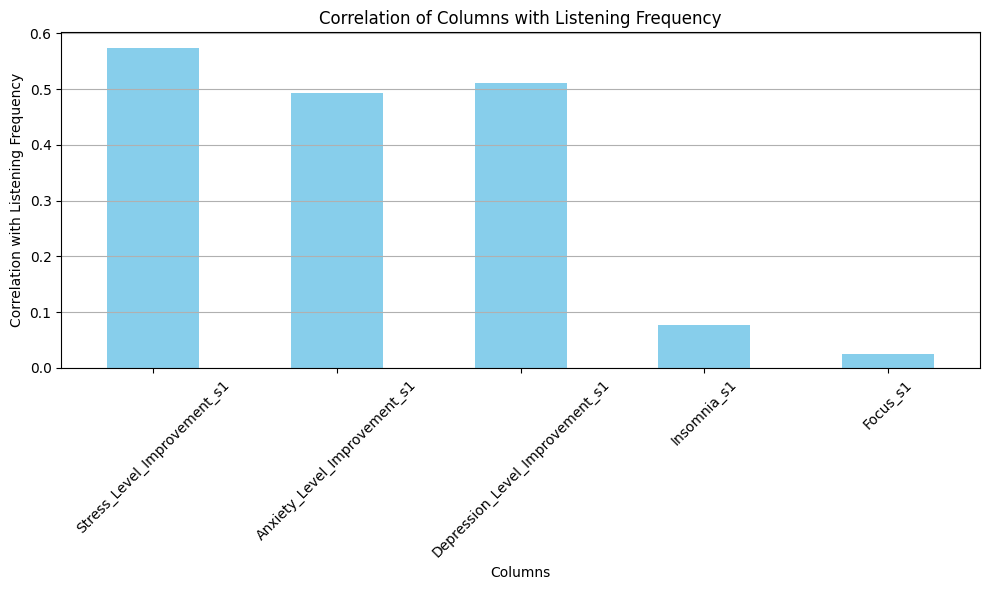

In [14]:
listening_frequency = 'Listening_Frequency_s1'

#list of columns to calculate correlation
columns_of_interest = ['Stress_Level_Improvement_s1', 'Anxiety_Level_Improvement_s1', 'Depression_Level_Improvement_s1', 'Insomnia_s1', 'Focus_s1']
# columns_of_interest = ['Stress_Level_Before_s1', 'Stress_Level_After_s1', 'Anxiety_Level_Before_s1', 'Anxiety_Level_After_s1', 'Depression_Level_Before_s1', 'Depression_Level_After_s1', 'Insomnia_s1', 'Focus_s1']

#correlation
correlation = df_survey[columns_of_interest + [listening_frequency]].corr()[listening_frequency]

correlation = correlation.drop('Listening_Frequency_s1')

plot.figure(figsize=(12, 8))

correlation.plot(kind='bar', color='skyblue', figsize=(10, 6))

plot.xlabel('Columns')
plot.ylabel('Correlation with Listening Frequency')
plot.title('Correlation of Columns with Listening Frequency')
plot.xticks(rotation=45)
plot.grid(axis='y')

plot.tight_layout()
plot.show()

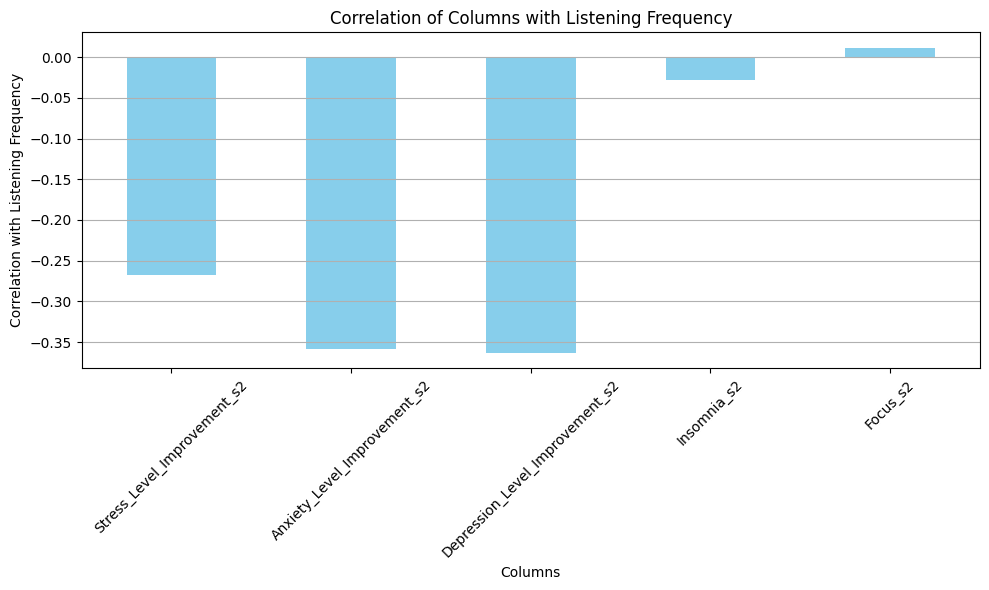

In [15]:
listening_frequency = 'Listening_Frequency_s2'

#list of columns to calculate correlation
columns_of_interest = ['Stress_Level_Improvement_s2', 'Anxiety_Level_Improvement_s2', 'Depression_Level_Improvement_s2', 'Insomnia_s2', 'Focus_s2']
# columns_of_interest = ['Stress_Level_Before_s2', 'Stress_Level_After_s2', 'Anxiety_Level_Before_s2', 'Anxiety_Level_After_s2', 'Depression_Level_Before_s2', 'Depression_Level_After_s2', 'Insomnia_s2', 'Focus_s2']

#correlation
correlation = df_survey[columns_of_interest + [listening_frequency]].corr()[listening_frequency]

correlation = correlation.drop('Listening_Frequency_s2')

plot.figure(figsize=(12, 8))

correlation.plot(kind='bar', color='skyblue', figsize=(10, 6))

plot.xlabel('Columns')
plot.ylabel('Correlation with Listening Frequency')
plot.title('Correlation of Columns with Listening Frequency')
plot.xticks(rotation=45)
plot.grid(axis='y')

plot.tight_layout()
plot.show()

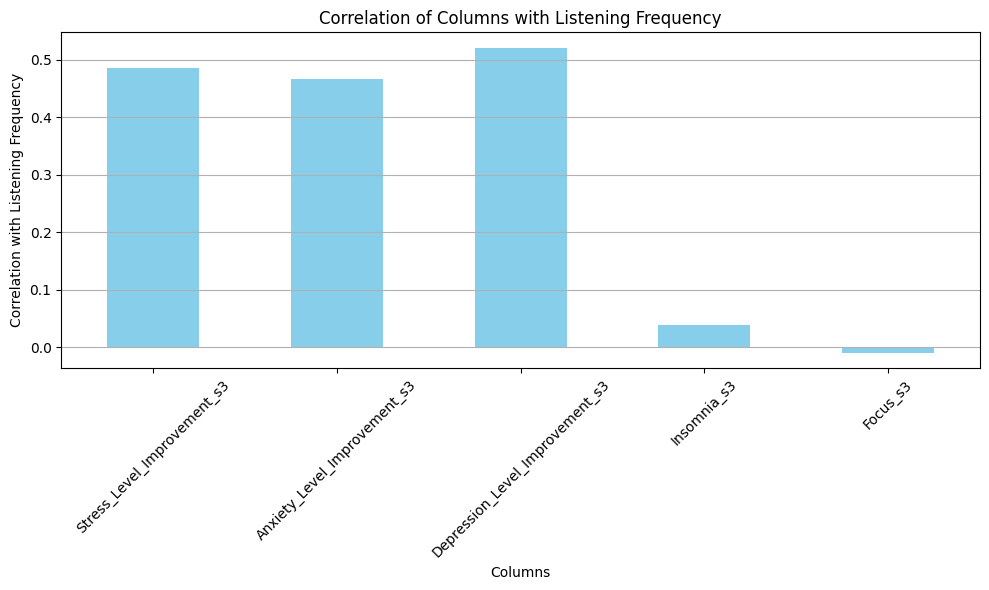

In [16]:
listening_frequency = 'Listening_Frequency_s3'

#list of columns to calculate correlation
columns_of_interest = ['Stress_Level_Improvement_s3', 'Anxiety_Level_Improvement_s3', 'Depression_Level_Improvement_s3', 'Insomnia_s3', 'Focus_s3']
# columns_of_interest = ['Stress_Level_Before_s3', 'Stress_Level_After_s3', 'Anxiety_Level_Before_s3', 'Anxiety_Level_After_s3', 'Depression_Level_Before_s3', 'Depression_Level_After_s3', 'Insomnia_s3', 'Focus_s3']

#correlation
correlation = df_survey[columns_of_interest + [listening_frequency]].corr()[listening_frequency]

correlation = correlation.drop('Listening_Frequency_s3')

plot.figure(figsize=(12, 8))

correlation.plot(kind='bar', color='skyblue', figsize=(10, 6))

plot.xlabel('Columns')
plot.ylabel('Correlation with Listening Frequency')
plot.title('Correlation of Columns with Listening Frequency')
plot.xticks(rotation=45)
plot.grid(axis='y')

plot.tight_layout()
plot.show()

Age_Group
25-34    355
19-24    202
<18       88
35-44     74
55+       74
45-54     37
Name: count, dtype: int64


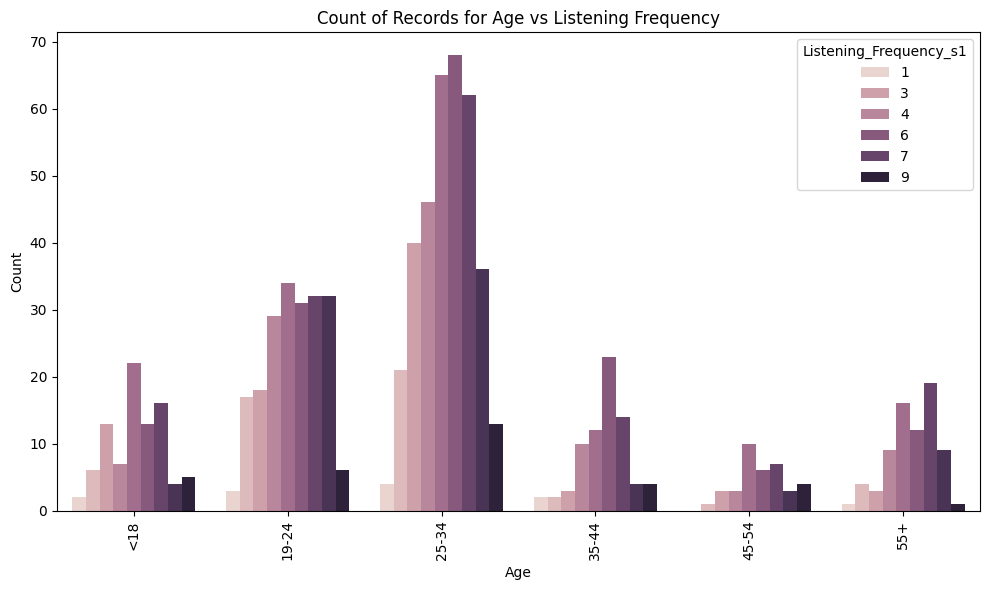

In [17]:
#age bins and corresponding labels for the 'Age' column
age_bins = [0, 18, 25, 35, 45, 55, 70]
age_labels = ['<18', '19-24', '25-34', '35-44', '45-54', '55+']
df_survey['Age_Group'] = pd.cut(df_survey['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df_survey['Age_Group'].value_counts()
print(age_group_counts)

#drop the original age column if needed
#df_survey.drop(columns=['age'], inplace=True)

#group data by 'Age_Group' and calculate mean listening frequency for each song
#double brackets around the column names = list for selection
frequency_by_age_group = df_survey.groupby('Age_Group')[['Listening_Frequency_s1', 'Listening_Frequency_s2', 'Listening_Frequency_s3']].mean()


plot.figure(figsize=(10, 6))
sb.countplot(data=df_survey, x='Age_Group', hue='Listening_Frequency_s1')
plot.title('Count of Records for Age vs Listening Frequency')
plot.xlabel('Age')
plot.ylabel('Count')
plot.xticks(rotation=90)  #rotate x-axis labels for better readability
plot.tight_layout()
plot.show()

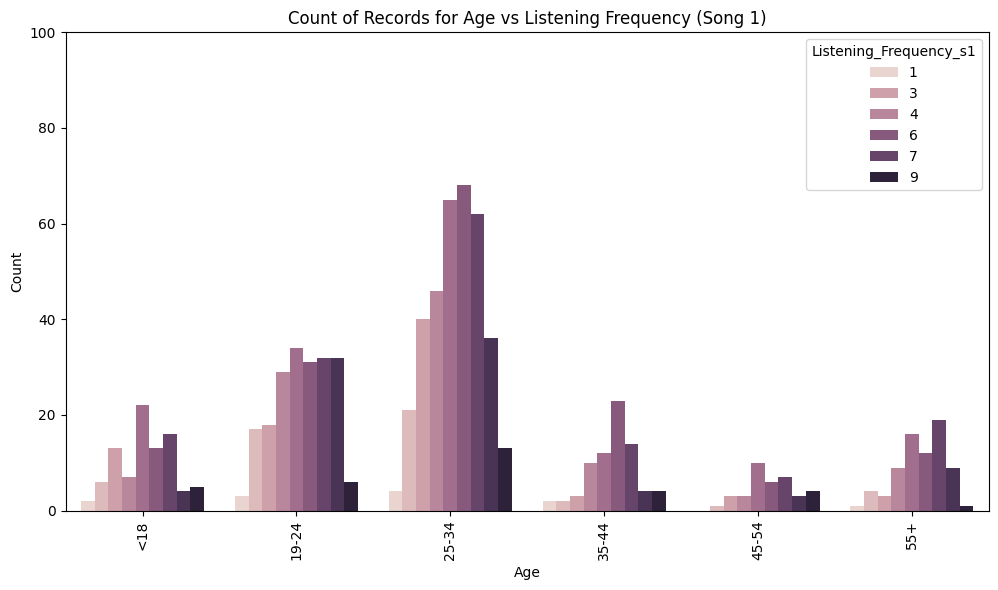

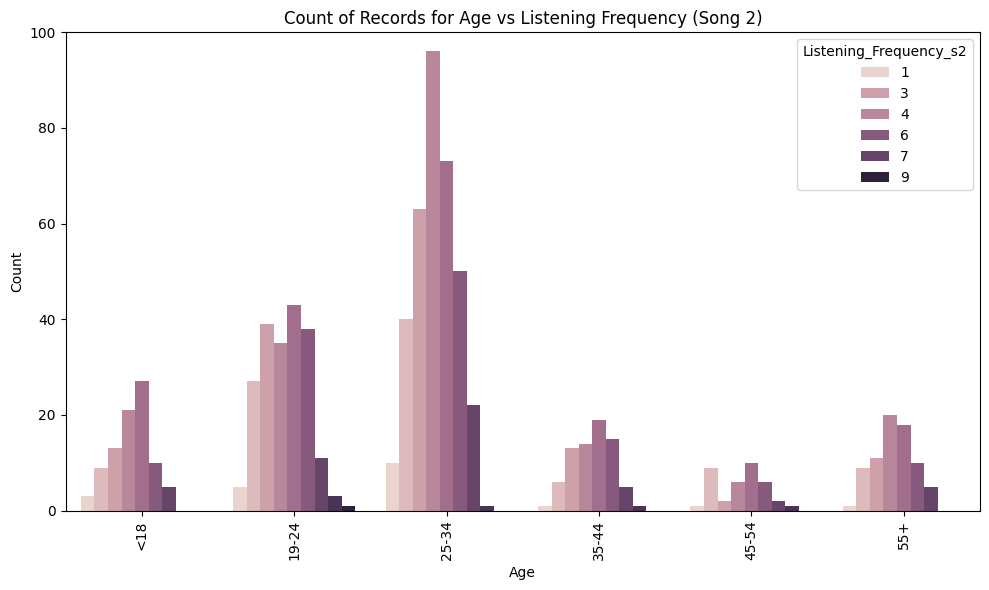

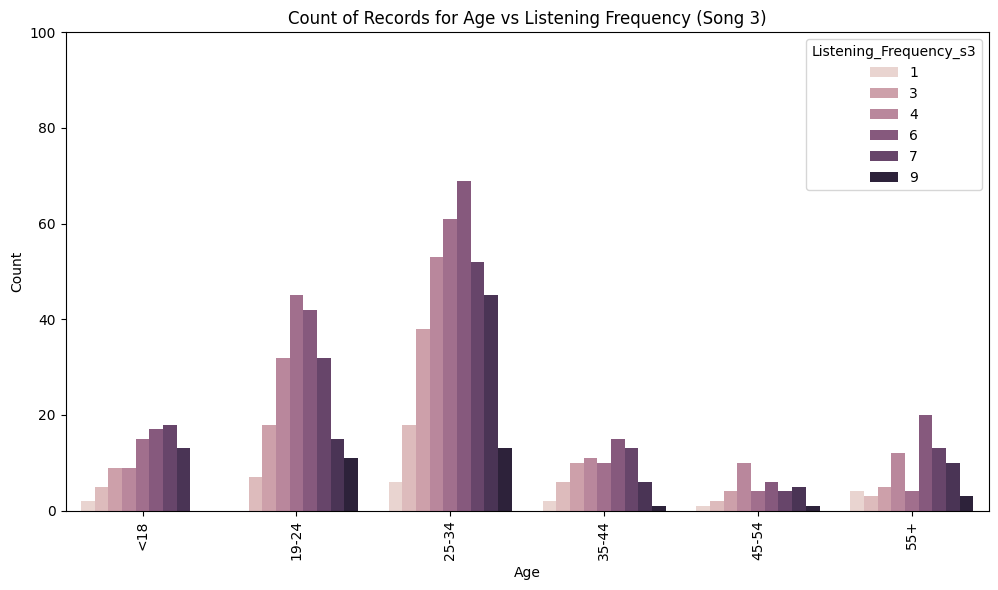

In [18]:

#plot for each song
for i in range(1, 4):
    plot.figure(figsize=(10, 6))
    sb.countplot(data=df_survey, x='Age_Group', hue=f'Listening_Frequency_s{i}')
    plot.title(f'Count of Records for Age vs Listening Frequency (Song {i})')
    plot.xlabel('Age')
    plot.ylabel('Count')
    plot.xticks(rotation=90)
    plot.tight_layout()
    plot.ylim(0, 100)
    plot.show()


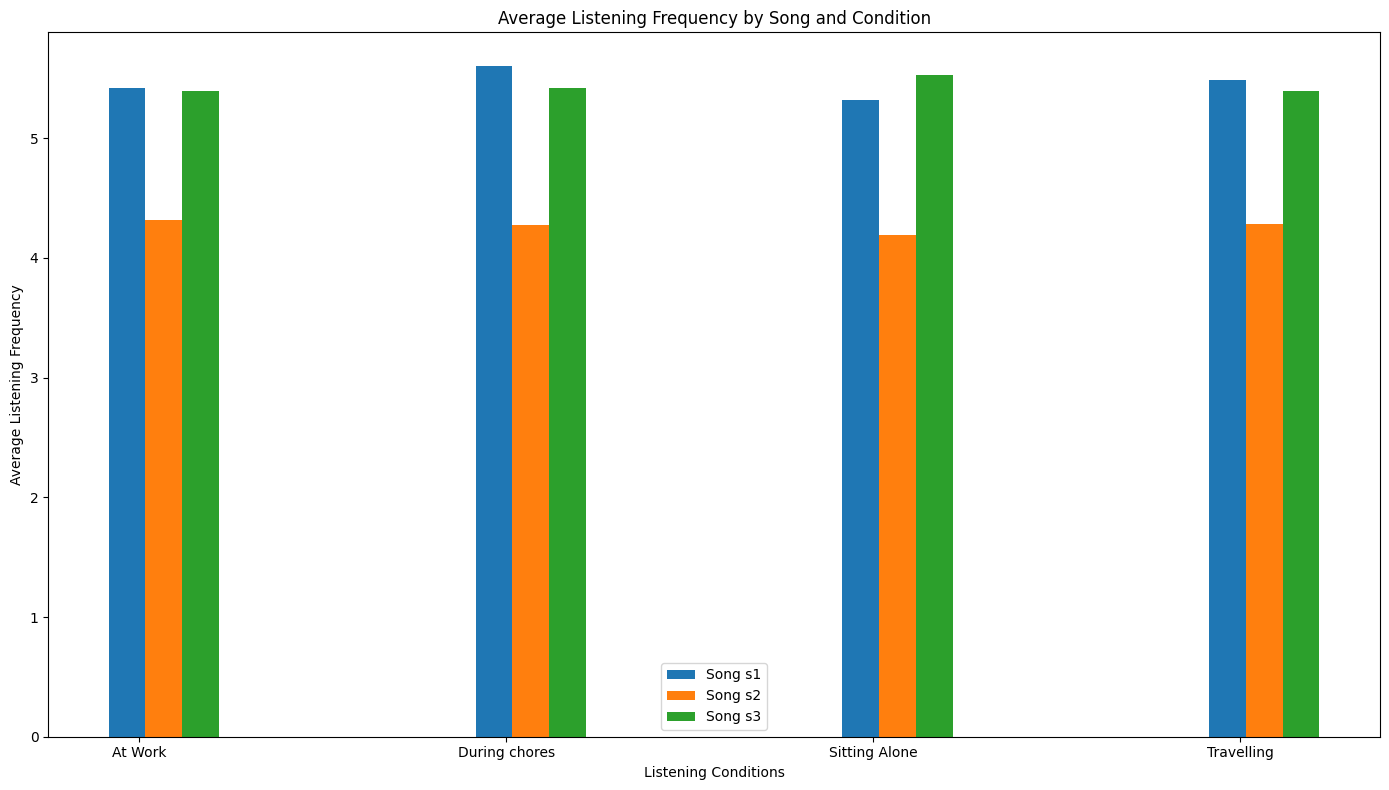

In [19]:
#with listening conditions

#listening conditions
conditions = ['At Work', 'During chores', 'Sitting Alone', 'Travelling']

#initialize dictionary to store average frequencies
average_frequencies = {song: {condition: 0 for condition in conditions} for song in ['s1', 's2', 's3']}

#calc average listening frequency for each song and condition
for song in ['s1', 's2', 's3']:
    for condition in conditions:
        condition_col = f'Listening_conditions_{song}_{condition}'
        frequency_col = f'Listening_Frequency_{song}'
        #multiply condition column with frequency column to get sum for each song and condition
        average_frequencies[song][condition] = (df_survey[condition_col] * df_survey[frequency_col]).sum() / df_survey[condition_col].sum()

fig, ax = plot.subplots(figsize=(14, 8))  # Set a large figure size to accommodate the data

bar_width = 0.1
index = np.arange(len(conditions))

#plot bars for each song and condition
for i, (song, frequencies) in enumerate(average_frequencies.items()):
    ax.bar(index + i*bar_width, frequencies.values(), bar_width, label=f'Song {song}')

ax.set_xlabel('Listening Conditions')
ax.set_ylabel('Average Listening Frequency')
ax.set_title('Average Listening Frequency by Song and Condition')
ax.set_xticks(index + bar_width / len(average_frequencies))
ax.set_xticklabels(conditions)
ax.legend()

plot.tight_layout()
plot.show()

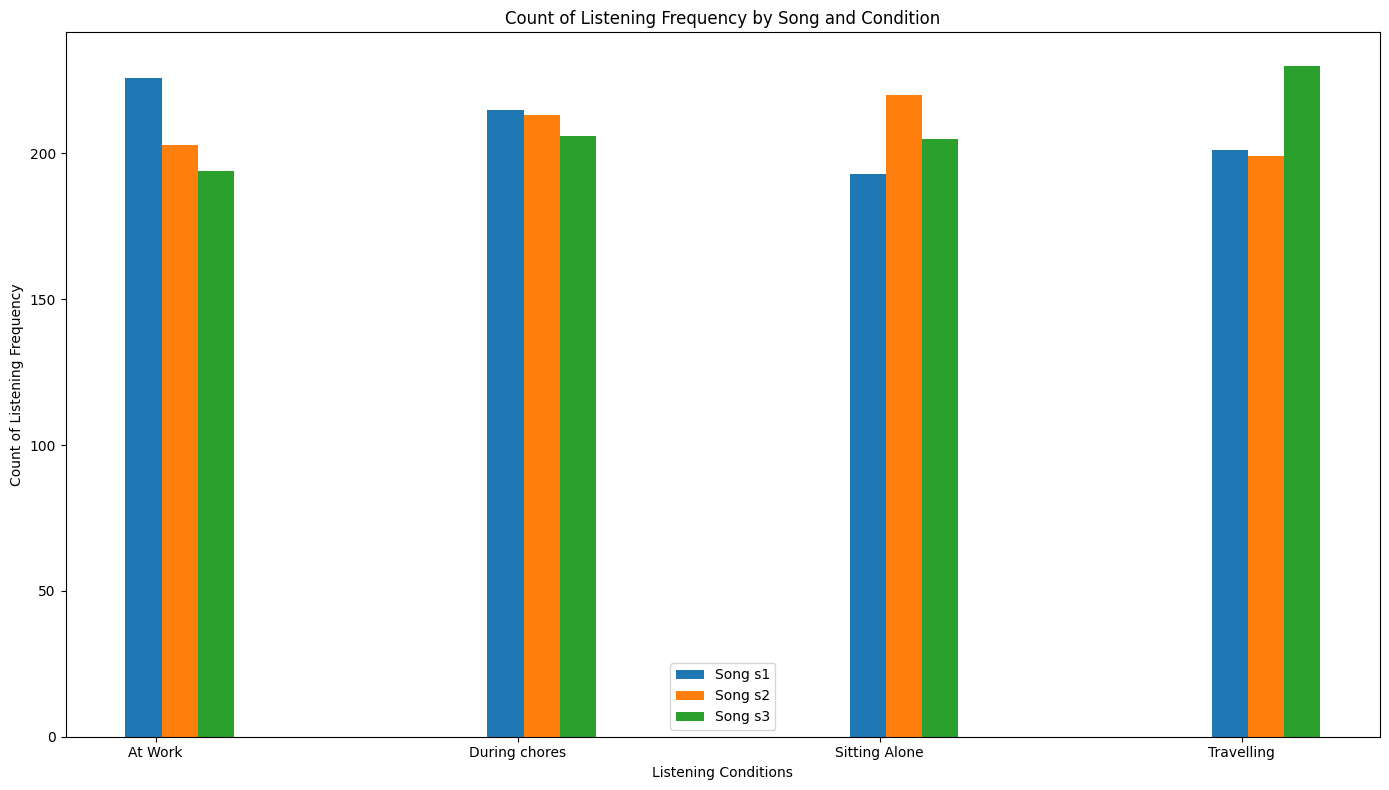

In [20]:

#listening conditions
conditions = ['At Work', 'During chores', 'Sitting Alone', 'Travelling']

#store count frequencies
count_frequencies = {song: {condition: 0 for condition in conditions} for song in ['s1', 's2', 's3']}

#calculate count listening frequency for each song and condition
for song in ['s1', 's2', 's3']:
    for condition in conditions:
        condition_col = f'Listening_conditions_{song}_{condition}'
        count_frequencies[song][condition] = df_survey[condition_col].sum()

fig, ax = plot.subplots(figsize=(14, 8))

bar_width = 0.1
index = np.arange(len(conditions))

#plot bars for each song and condition
for i, (song, frequencies) in enumerate(count_frequencies.items()):
    ax.bar(index + i*bar_width, frequencies.values(), bar_width, label=f'Song {song}')

ax.set_xlabel('Listening Conditions')
ax.set_ylabel('Count of Listening Frequency')
ax.set_title('Count of Listening Frequency by Song and Condition')
ax.set_xticks(index + bar_width / len(count_frequencies))
ax.set_xticklabels(conditions)
ax.legend()

plot.tight_layout()
plot.show()


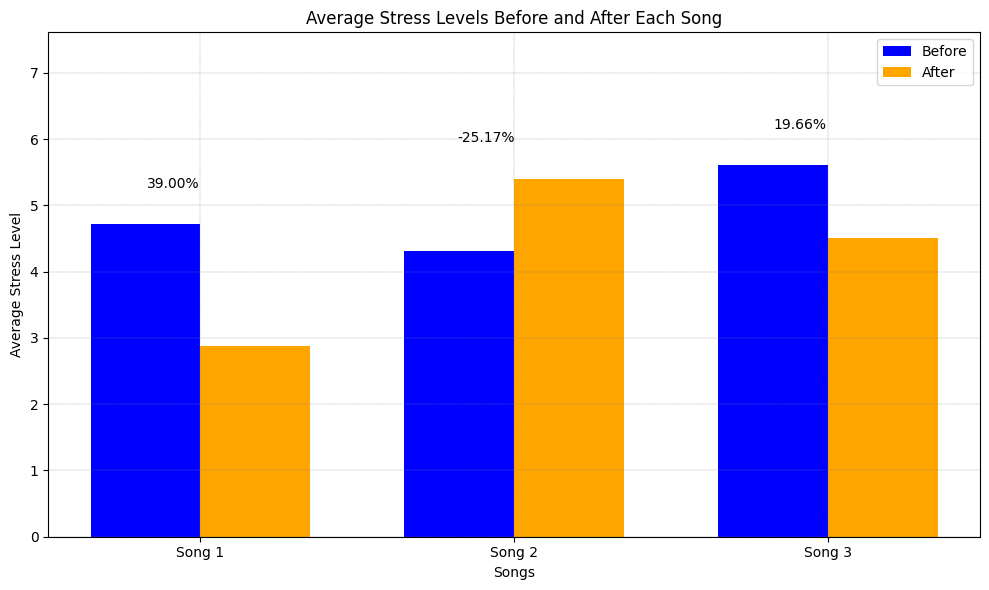

In [21]:
stress_means_before = df_survey[['Stress_Level_Before_s1', 'Stress_Level_Before_s2', 'Stress_Level_Before_s3']].mean()
stress_means_after = df_survey[['Stress_Level_After_s1', 'Stress_Level_After_s2', 'Stress_Level_After_s3']].mean()

#percentage decrease
percentage_decrease = []

for i in range(len(stress_means_before)):
    percentage = ((stress_means_before.iloc[i] - stress_means_after.iloc[i])/ stress_means_before[i]) * 100
    percentage_decrease.append(percentage)

#bar chart with percentage decrease
fig, ax = plot.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(stress_means_before))
for i in range(len(stress_means_before)):
    ax.bar(index[i], stress_means_before[i], bar_width, label='Before' if i == 0 else '', color='blue')
    ax.bar(index[i] + bar_width, stress_means_after[i], bar_width, label='After' if i == 0 else '', color='orange')

#addpercentage decrease text
for i in range(len(percentage_decrease)):
    ax.text(index[i] + bar_width / 4, max(stress_means_before[i], stress_means_after[i]) + 0.5, f'{percentage_decrease[i]:.2f}%', ha='center', va='bottom')

ax.set_xlabel('Songs')
ax.set_ylabel('Average Stress Level')
ax.set_title('Average Stress Levels Before and After Each Song')
ax.set_ylim(0, max(max(stress_means_before), max(stress_means_after)) + 2)

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Song 1', 'Song 2', 'Song 3'])
ax.legend()
ax.grid(True, linestyle='--', color='gray', linewidth=0.25)
plot.tight_layout()
plot.show()


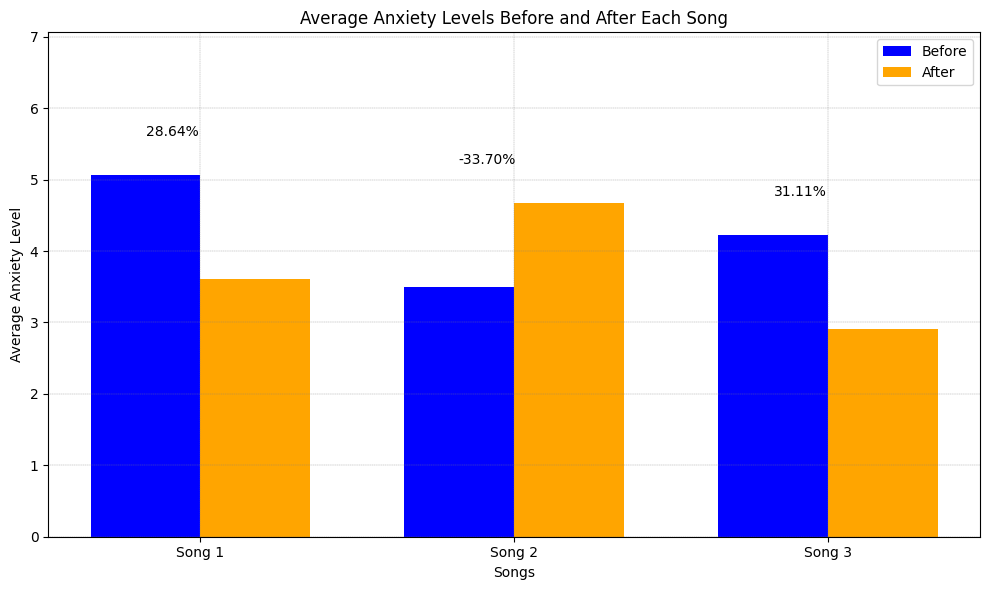

In [123]:
anxiety_means_before = df_survey[['Anxiety_Level_Before_s1', 'Anxiety_Level_Before_s2', 'Anxiety_Level_Before_s3']].mean()
anxiety_means_after = df_survey[['Anxiety_Level_After_s1', 'Anxiety_Level_After_s2', 'Anxiety_Level_After_s3']].mean()

#percentage decrease
percentage_decrease = []

for i in range(len(anxiety_means_before)):
    percentage = ((anxiety_means_before.iloc[i] - anxiety_means_after.iloc[i])/ anxiety_means_before[i]) * 100
    percentage_decrease.append(percentage)

#bar chart with percentage decrease
fig, ax = plot.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(anxiety_means_before))
for i in range(len(anxiety_means_before)):
    ax.bar(index[i], anxiety_means_before[i], bar_width, label='Before' if i == 0 else '', color='blue')
    ax.bar(index[i] + bar_width, anxiety_means_after[i], bar_width, label='After' if i == 0 else '', color='orange')

#addpercentage decrease text
for i in range(len(percentage_decrease)):
    ax.text(index[i] + bar_width / 4, max(anxiety_means_before[i], anxiety_means_after[i]) + 0.5, f'{percentage_decrease[i]:.2f}%', ha='center', va='bottom')

ax.set_xlabel('Songs')
ax.set_ylabel('Average Anxiety Level')
ax.set_title('Average Anxiety Levels Before and After Each Song')
ax.set_ylim(0, max(max(anxiety_means_before), max(anxiety_means_after)) + 2)

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Song 1', 'Song 2', 'Song 3'])
ax.legend()
ax.grid(True, linestyle='--', color='gray', linewidth=0.25)
plot.tight_layout()
plot.show()

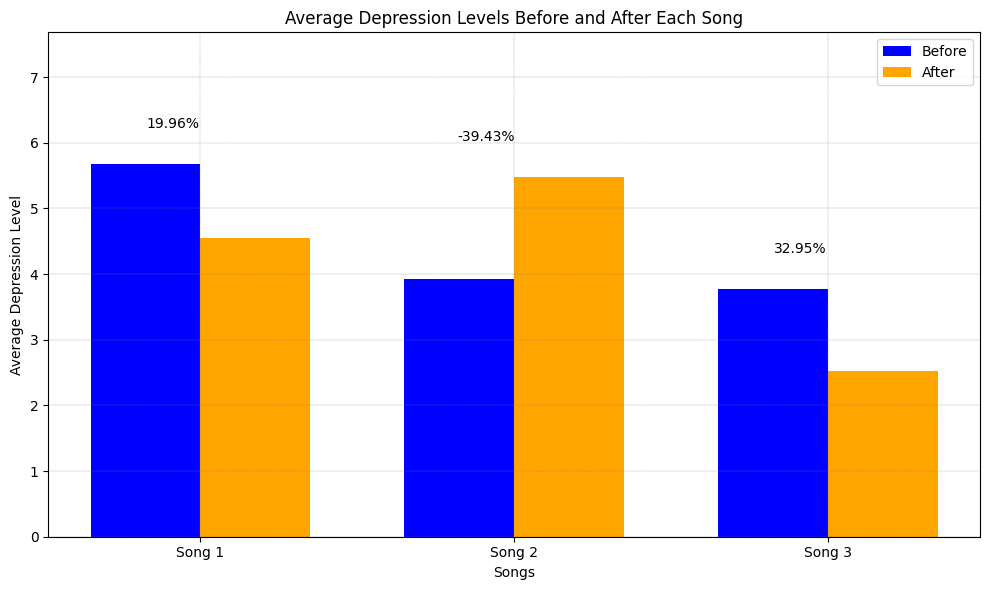

In [124]:
depression_means_before = df_survey[['Depression_Level_Before_s1', 'Depression_Level_Before_s2', 'Depression_Level_Before_s3']].mean()
depression_means_after = df_survey[['Depression_Level_After_s1', 'Depression_Level_After_s2', 'Depression_Level_After_s3']].mean()

#percentage decrease
percentage_decrease = []

for i in range(len(depression_means_before)):
    percentage = ((depression_means_before.iloc[i] - depression_means_after.iloc[i])/ depression_means_before[i]) * 100
    percentage_decrease.append(percentage)

#bar chart with percentage decrease
fig, ax = plot.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(depression_means_before))
for i in range(len(depression_means_before)):
    ax.bar(index[i], depression_means_before[i], bar_width, label='Before' if i == 0 else '', color='blue')
    ax.bar(index[i] + bar_width, depression_means_after[i], bar_width, label='After' if i == 0 else '', color='orange')

#addpercentage decrease text
for i in range(len(percentage_decrease)):
    ax.text(index[i] + bar_width / 4, max(depression_means_before[i], depression_means_after[i]) + 0.5, f'{percentage_decrease[i]:.2f}%', ha='center', va='bottom')

ax.set_xlabel('Songs')
ax.set_ylabel('Average Depression Level')
ax.set_title('Average Depression Levels Before and After Each Song')
ax.set_ylim(0, max(max(depression_means_before), max(depression_means_after)) + 2)

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Song 1', 'Song 2', 'Song 3'])
ax.legend()
ax.grid(True, linestyle='--', color='gray', linewidth=0.25)
plot.tight_layout()
plot.show()

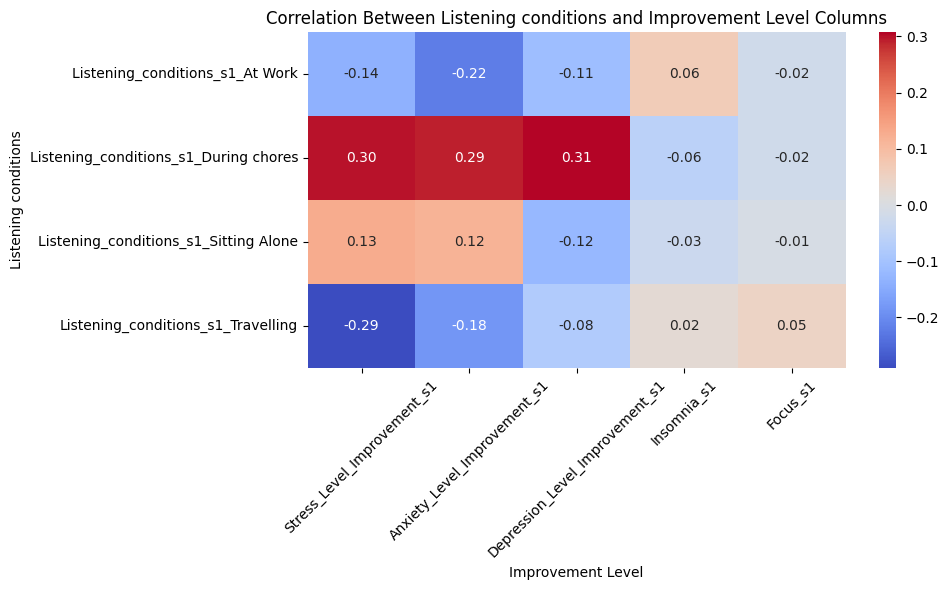

In [128]:
import seaborn as sb

listening_conditions = ['Listening_conditions_s1_At Work', 'Listening_conditions_s1_During chores', 'Listening_conditions_s1_Sitting Alone', 'Listening_conditions_s1_Travelling']


#columns for which we calculate correlation
columns_of_interest = ['Stress_Level_Improvement_s1', 'Anxiety_Level_Improvement_s1', 'Depression_Level_Improvement_s1', 'Insomnia_s1', 'Focus_s1']
# columns_of_interest = ['Stress_Level_Before_s1', 'Stress_Level_After_s1', 'Anxiety_Level_Before_s1', 'Anxiety_Level_After_s1', 'Insomnia_s1', 'Depression_Level_Before_s1', 'Depression_Level_After_s1', 'Focus_s1']

#correlation matrix
correlation_matrix = df_survey[listening_conditions + columns_of_interest].corr()

#extract the correlations
correlation_values = correlation_matrix.loc[listening_conditions, columns_of_interest]
plot.figure(figsize=(10, 6))
sb.heatmap(correlation_values, annot=True, cmap='coolwarm', fmt=".2f")
plot.title('Correlation Between Listening conditions and Improvement Level Columns')
plot.xlabel('Improvement Level')
plot.ylabel('Listening conditions')
plot.xticks(rotation=45)
plot.yticks(rotation=0)
plot.tight_layout()
plot.show()

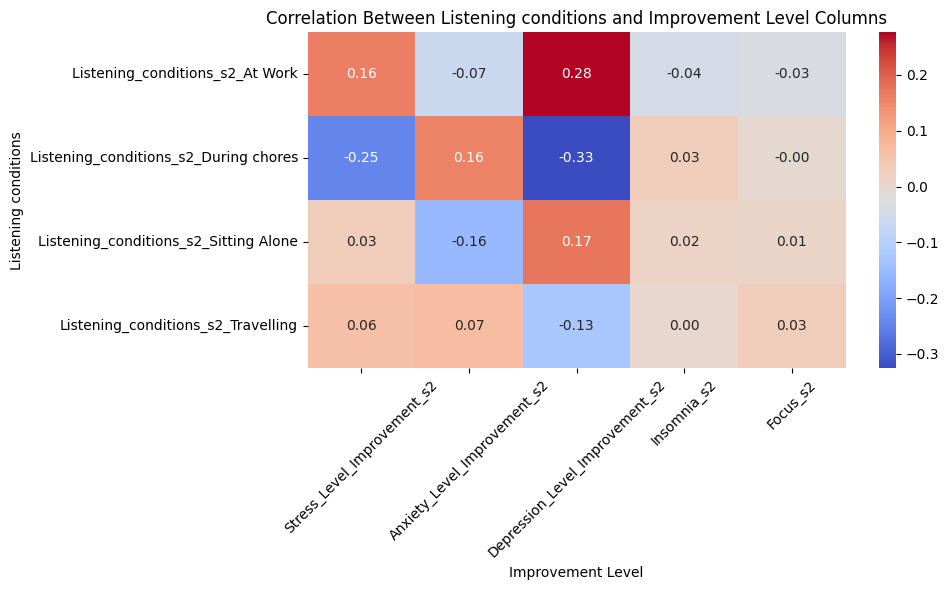

In [129]:
listening_conditions = ['Listening_conditions_s2_At Work', 'Listening_conditions_s2_During chores', 'Listening_conditions_s2_Sitting Alone', 'Listening_conditions_s2_Travelling']


#columns for which we calculate correlation
columns_of_interest = ['Stress_Level_Improvement_s2', 'Anxiety_Level_Improvement_s2', 'Depression_Level_Improvement_s2', 'Insomnia_s2', 'Focus_s2']
# columns_of_interest = ['Stress_Level_Before_s1', 'Stress_Level_After_s1', 'Anxiety_Level_Before_s1', 'Anxiety_Level_After_s1', 'Insomnia_s1', 'Depression_Level_Before_s1', 'Depression_Level_After_s1', 'Focus_s1']

#correlation matrix
correlation_matrix = df_survey[listening_conditions + columns_of_interest].corr()

#extract the correlations
correlation_values = correlation_matrix.loc[listening_conditions, columns_of_interest]
plot.figure(figsize=(10, 6))
sb.heatmap(correlation_values, annot=True, cmap='coolwarm', fmt=".2f")
plot.title('Correlation Between Listening conditions and Improvement Level Columns')
plot.xlabel('Improvement Level')
plot.ylabel('Listening conditions')
plot.xticks(rotation=45)
plot.yticks(rotation=0)
plot.tight_layout()
plot.show()

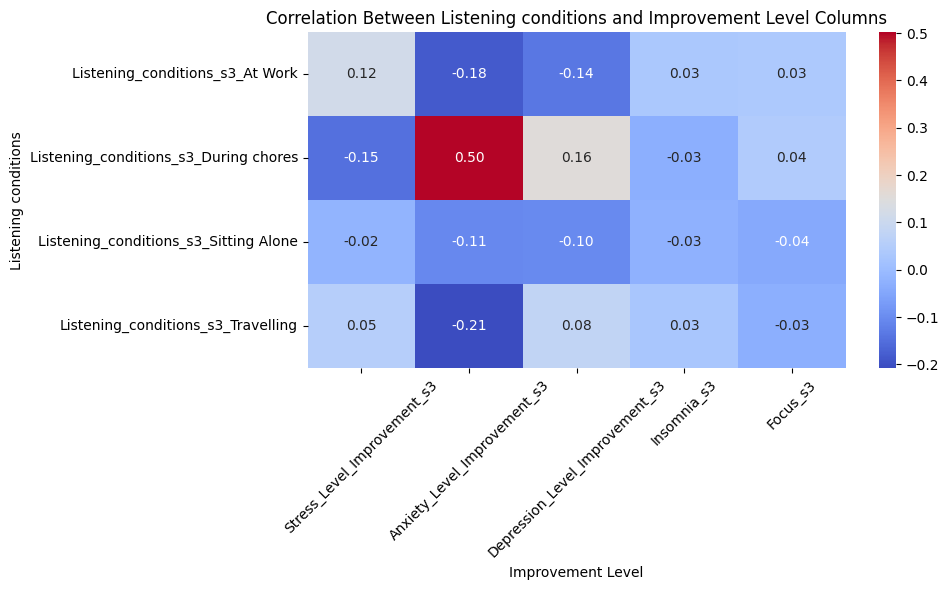

In [131]:
listening_conditions = ['Listening_conditions_s3_At Work', 'Listening_conditions_s3_During chores', 'Listening_conditions_s3_Sitting Alone', 'Listening_conditions_s3_Travelling']


#columns for which we calculate correlation
columns_of_interest = ['Stress_Level_Improvement_s3', 'Anxiety_Level_Improvement_s3', 'Depression_Level_Improvement_s3', 'Insomnia_s3', 'Focus_s3']
# columns_of_interest = ['Stress_Level_Before_s1', 'Stress_Level_After_s1', 'Anxiety_Level_Before_s1', 'Anxiety_Level_After_s1', 'Insomnia_s1', 'Depression_Level_Before_s1', 'Depression_Level_After_s1', 'Focus_s1']

#correlation matrix
correlation_matrix = df_survey[listening_conditions + columns_of_interest].corr()

#extract the correlations
correlation_values = correlation_matrix.loc[listening_conditions, columns_of_interest]
plot.figure(figsize=(10, 6))
sb.heatmap(correlation_values, annot=True, cmap='coolwarm', fmt=".2f")
plot.title('Correlation Between Listening conditions and Improvement Level Columns')
plot.xlabel('Improvement Level')
plot.ylabel('Listening conditions')
plot.xticks(rotation=45)
plot.yticks(rotation=0)
plot.tight_layout()
plot.show()

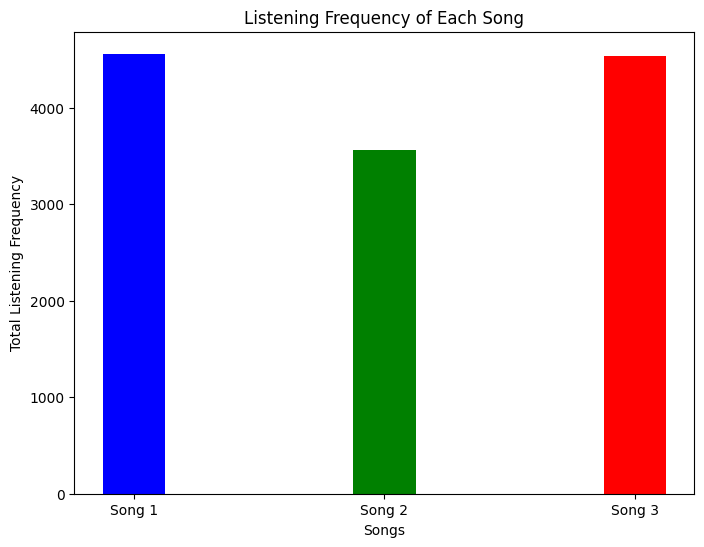

In [27]:
#this will show how many people listen to each song.
listening_frequencies = {
    'Song 1': df_survey['Listening_Frequency_s1'].sum(),
    'Song 2': df_survey['Listening_Frequency_s2'].sum(),
    'Song 3': df_survey['Listening_Frequency_s3'].sum()
}

plot.figure(figsize=(8, 6))
plot.bar(listening_frequencies.keys(), listening_frequencies.values(), color=['blue', 'green', 'red'], width = 0.25)
plot.title('Listening Frequency of Each Song')
plot.xlabel('Songs')
plot.ylabel('Total Listening Frequency')
plot.show()

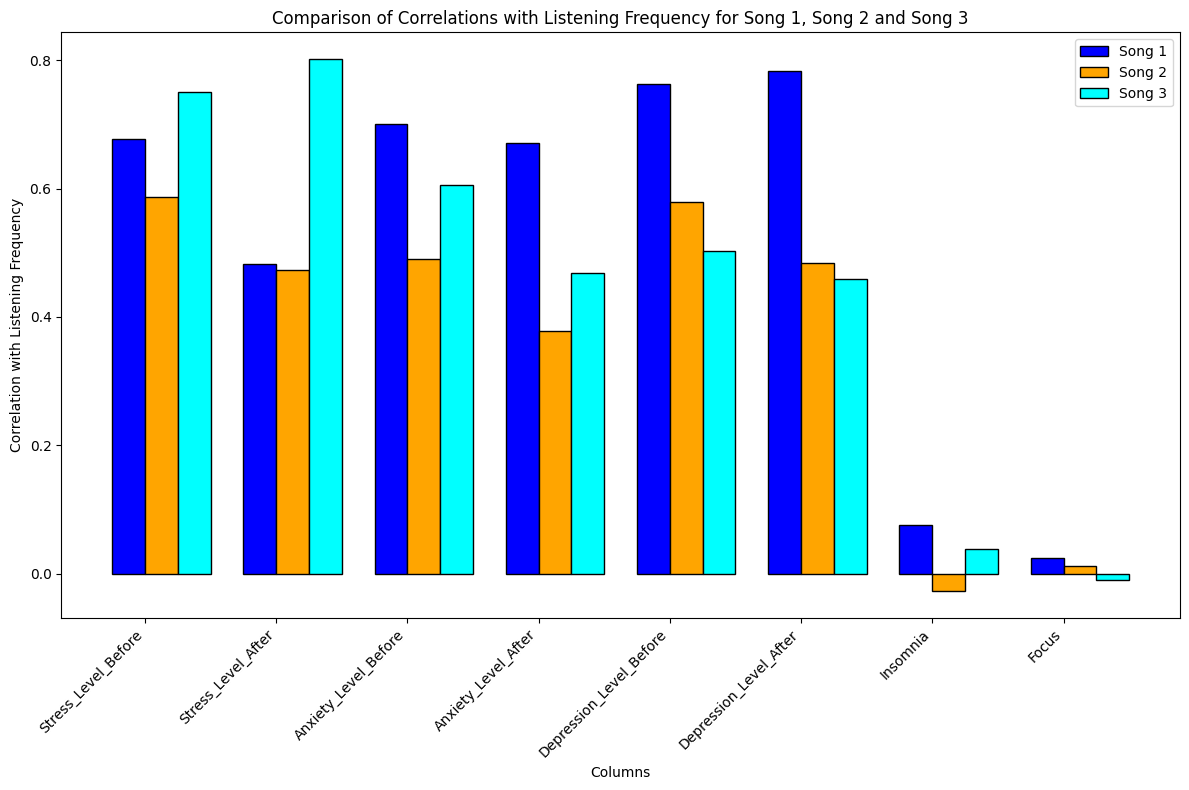

In [28]:
#columnsfor s1, s3 and s2
columns_of_interest_s1 = ['Stress_Level_Before_s1', 'Stress_Level_After_s1', 'Anxiety_Level_Before_s1', 'Anxiety_Level_After_s1', 'Depression_Level_Before_s1', 'Depression_Level_After_s1', 'Insomnia_s1', 'Focus_s1']
columns_of_interest_s2 = ['Stress_Level_Before_s2', 'Stress_Level_After_s2', 'Anxiety_Level_Before_s2', 'Anxiety_Level_After_s2', 'Depression_Level_Before_s2', 'Depression_Level_After_s2', 'Insomnia_s2', 'Focus_s2']
columns_of_interest_s3 = ['Stress_Level_Before_s3', 'Stress_Level_After_s3', 'Anxiety_Level_Before_s3', 'Anxiety_Level_After_s3', 'Depression_Level_Before_s3', 'Depression_Level_After_s3', 'Insomnia_s3', 'Focus_s3']

#calculate correlations for s1, s3 and s2
correlation_s1 = df_survey[columns_of_interest_s1 + ['Listening_Frequency_s1']].corr()['Listening_Frequency_s1']
correlation_s2 = df_survey[columns_of_interest_s2 + ['Listening_Frequency_s2']].corr()['Listening_Frequency_s2']
correlation_s3 = df_survey[columns_of_interest_s3 + ['Listening_Frequency_s3']].corr()['Listening_Frequency_s3']

#remove the self-correlation entry
correlation_s1 = correlation_s1.drop('Listening_Frequency_s1')
correlation_s2 = correlation_s2.drop('Listening_Frequency_s2')
correlation_s3 = correlation_s3.drop('Listening_Frequency_s3')

fig, ax = plot.subplots(figsize=(12, 8))
bar_width = 0.25  #width of the bars
index = np.arange(len(correlation_s1))

#plotting s1, s3 and s2 correlations
bar1 = ax.bar(index, correlation_s1, bar_width, label='Song 1', color='blue', edgecolor='black')
bar2 = ax.bar(index + bar_width, correlation_s2, bar_width, label='Song 2', color='orange', edgecolor='black')
bar2 = ax.bar(index + bar_width+ bar_width, correlation_s3, bar_width, label='Song 3', color='cyan', edgecolor='black')

ax.set_xlabel('Columns')
ax.set_ylabel('Correlation with Listening Frequency')
ax.set_title('Comparison of Correlations with Listening Frequency for Song 1, Song 2 and Song 3')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Stress_Level_Before', 'Stress_Level_After', 'Anxiety_Level_Before', 'Anxiety_Level_After', 'Depression_Level_Before', 'Depression_Level_After', 'Insomnia', 'Focus'], rotation=45, ha='right')
ax.legend()
plot.tight_layout()
plot.show()

### **Examine the 'Listening_conditions' columns to determine if the context in which the songs were listened to had any impact on the listeners' mental health.**

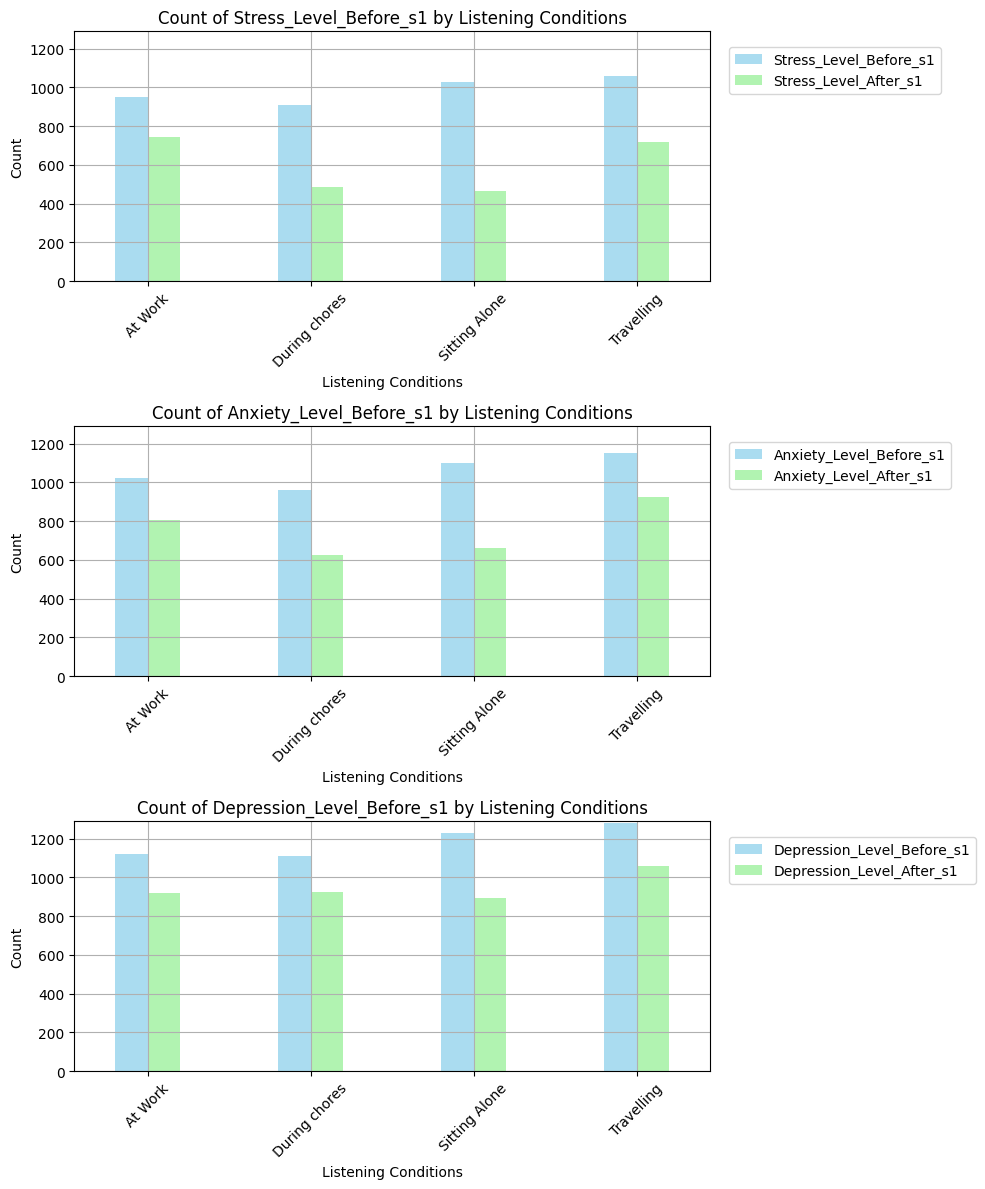

In [29]:
listening_conditions_cols = [col for col in df_survey.columns if 'Listening_conditions_s1' in col]
mental_health_cols = ['Stress_Level_Before_s1', 'Stress_Level_After_s1',
                      'Anxiety_Level_Before_s1', 'Anxiety_Level_After_s1',
                      'Depression_Level_Before_s1', 'Depression_Level_After_s1']
listening_conditions_counts = df_survey.groupby(listening_conditions_cols)[mental_health_cols].sum()

size1 = int(len(mental_health_cols)/2)
# Plot bar graphs to visualize the distribution of mental health indicators across different listening conditions
fig, axs = plot.subplots(nrows=size1, ncols=1, figsize=(10, 4 * size1))

for i, col in enumerate(mental_health_cols[::2]):
    # Plot actual counts
    counts = listening_conditions_counts[[mental_health_cols[i*2], mental_health_cols[(i*2)+1]]]
    counts.index = ['At Work', 'During chores', 'Sitting Alone', 'Travelling']
    counts.plot(kind='bar', ax=axs[i], color=['skyblue', 'lightgreen'], alpha=0.7, width=0.4)
    axs[i].set_title(f'Count of {col} by Listening Conditions')
    axs[i].set_xlabel('Listening Conditions')
    axs[i].set_ylabel('Count')
    axs[i].set_ylim(0, max(listening_conditions_counts.max()) + 10)  # Adjust y-axis limit
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True)
    axs[i].legend(loc=(1.03, 0.75), fontsize=10)

plot.tight_layout()
plot.show()

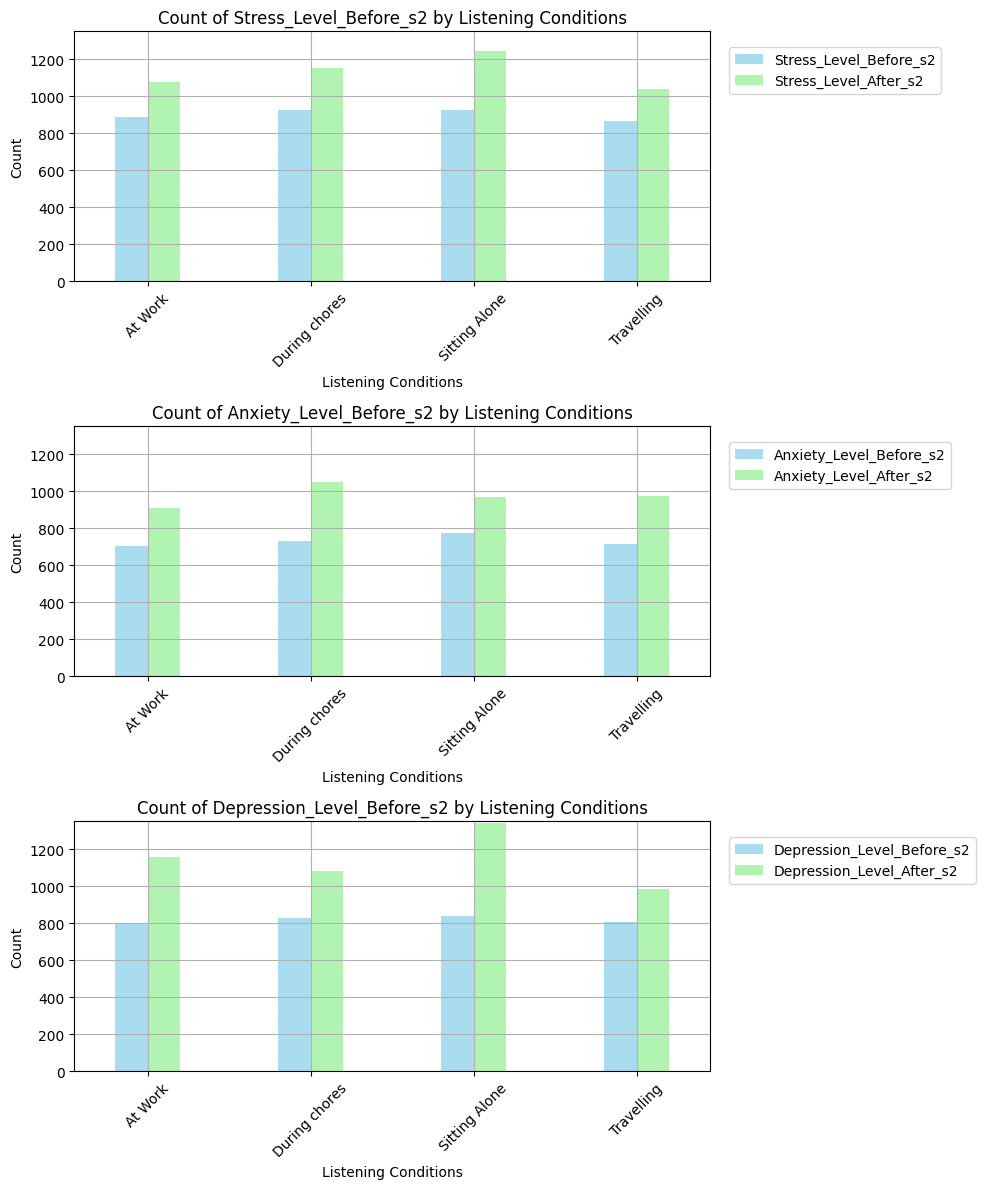

In [30]:
listening_conditions_cols = [col for col in df_survey.columns if 'Listening_conditions_s2' in col]
mental_health_cols = ['Stress_Level_Before_s2', 'Stress_Level_After_s2',
                      'Anxiety_Level_Before_s2', 'Anxiety_Level_After_s2',
                      'Depression_Level_Before_s2', 'Depression_Level_After_s2']
listening_conditions_counts = df_survey.groupby(listening_conditions_cols)[mental_health_cols].sum()

size1 = int(len(mental_health_cols)/2)
# Plot bar graphs to visualize the distribution of mental health indicators across different listening conditions
fig, axs = plot.subplots(nrows=size1, ncols=1, figsize=(10, 4 * size1))

for i, col in enumerate(mental_health_cols[::2]):
    # Plot actual counts
    counts = listening_conditions_counts[[mental_health_cols[i*2], mental_health_cols[(i*2)+1]]]
    counts.index = ['At Work', 'During chores', 'Sitting Alone', 'Travelling']
    counts.plot(kind='bar', ax=axs[i], color=['skyblue', 'lightgreen'], alpha=0.7, width=0.4)
    axs[i].set_title(f'Count of {col} by Listening Conditions')
    axs[i].set_xlabel('Listening Conditions')
    axs[i].set_ylabel('Count')
    axs[i].set_ylim(0, max(listening_conditions_counts.max()) + 10)  # Adjust y-axis limit
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True)
    axs[i].legend(loc=(1.03, 0.75), fontsize=10)

plot.tight_layout()
plot.show()

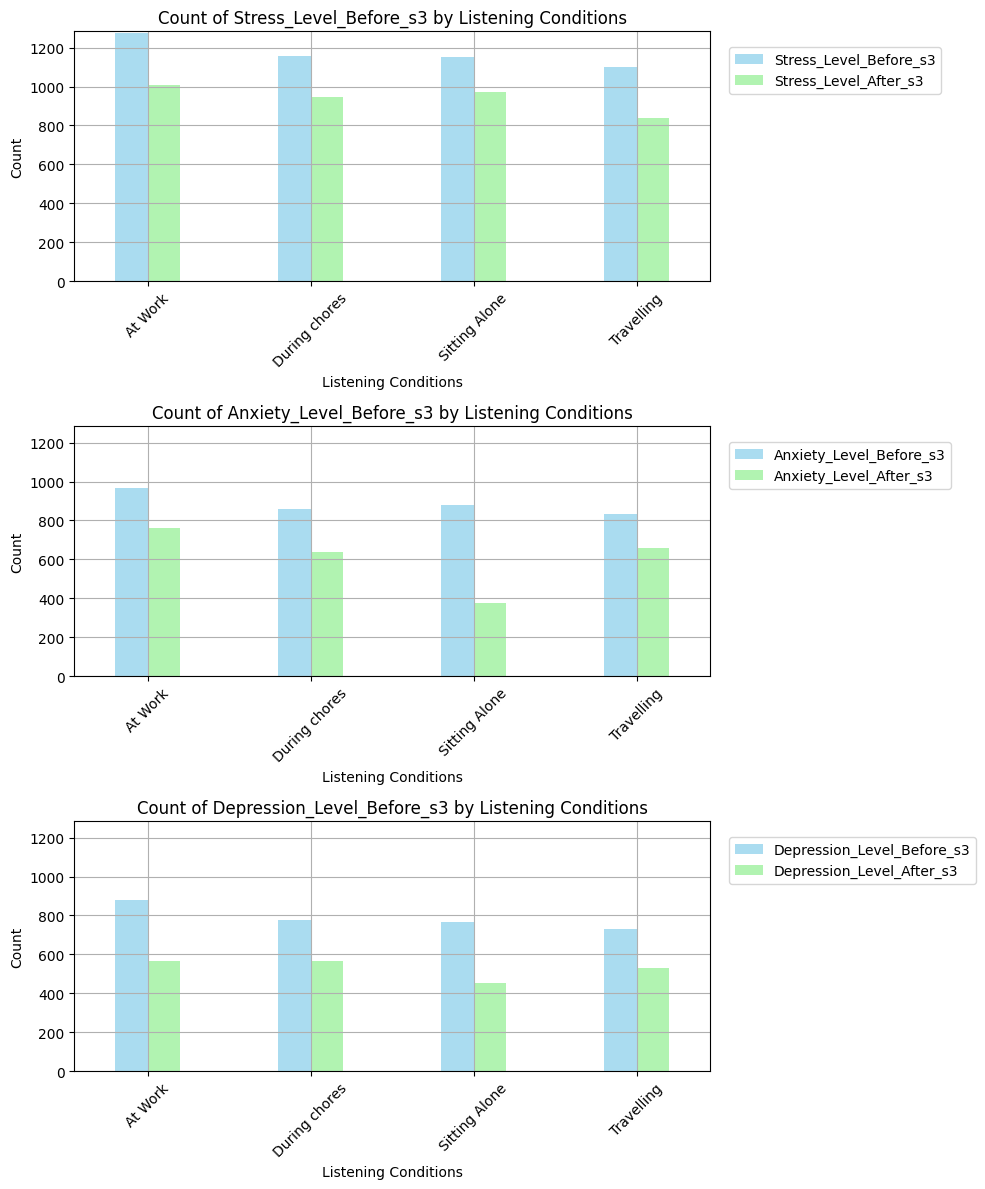

In [31]:
listening_conditions_cols = [col for col in df_survey.columns if 'Listening_conditions_s3' in col]
mental_health_cols = ['Stress_Level_Before_s3', 'Stress_Level_After_s3',
                      'Anxiety_Level_Before_s3', 'Anxiety_Level_After_s3',
                      'Depression_Level_Before_s3', 'Depression_Level_After_s3']
listening_conditions_counts = df_survey.groupby(listening_conditions_cols)[mental_health_cols].sum()

size1 = int(len(mental_health_cols)/2)
# Plot bar graphs to visualize the distribution of mental health indicators across different listening conditions
fig, axs = plot.subplots(nrows=size1, ncols=1, figsize=(10, 4 * size1))

for i, col in enumerate(mental_health_cols[::2]):
    # Plot actual counts
    counts = listening_conditions_counts[[mental_health_cols[i*2], mental_health_cols[(i*2)+1]]]
    counts.index = ['At Work', 'During chores', 'Sitting Alone', 'Travelling']
    counts.plot(kind='bar', ax=axs[i], color=['skyblue', 'lightgreen'], alpha=0.7, width=0.4)
    axs[i].set_title(f'Count of {col} by Listening Conditions')
    axs[i].set_xlabel('Listening Conditions')
    axs[i].set_ylabel('Count')
    axs[i].set_ylim(0, max(listening_conditions_counts.max()) + 10)  # Adjust y-axis limit
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True)
    axs[i].legend(loc=(1.03, 0.75), fontsize=10)

plot.tight_layout()
plot.show()

# **Improvement level prediction - Stress for Song 1**

In [32]:
df_survey = df_survey.dropna()
columns_to_keep = ['Gender_Female','Gender_Male', 'Age', 'Listening_Frequency_s1', 'Stress_Level_Before_s1', 'Listening_conditions_s1_At Work', 'Listening_conditions_s1_During chores', 'Listening_conditions_s1_Sitting Alone', 'Listening_conditions_s1_Travelling']
X = df_survey[columns_to_keep]

In [33]:
#df_survey.info()

min_value = df_survey['Stress_Level_Improvement_s1'].min()
max_value = df_survey['Stress_Level_Improvement_s1'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: -1.8
Maximum value: 5.4


In [34]:
#define the bins and labels for categorization
bins = [-3, -1, 0, 1, 3, 5, 6]
labels = ['Moderate Decrease','Slight Decrease', 'Slight Increase','Moderate increase','High Increase', 'Very High Increase']

#create a new column with categorical labels based on the binning
df_survey['Stress_Level_Improvement_Category'] = pd.cut(df_survey['Stress_Level_Improvement_s1'], bins=bins, labels=labels)

#drop the original continuous column if no longer need
# df.drop(columns=['Stress_Level_Improvement_s1'], inplace=True)

print(df_survey[['Stress_Level_Improvement_s1', 'Stress_Level_Improvement_Category']].head())

y = df_survey['Stress_Level_Improvement_Category']


   Stress_Level_Improvement_s1 Stress_Level_Improvement_Category
0                          3.0                 Moderate increase
1                          3.0                 Moderate increase
2                          1.5                 Moderate increase
3                          1.4                 Moderate increase
4                          0.5                   Slight Increase


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiate StandardScaler
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation to  test data
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score

#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

#SVM
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#Decision Tree
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.8554216867469879
SVM Accuracy: 0.8493975903614458
Decision Tree Accuracy: 0.7650602409638554


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

#train models
random_forest.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)


rf_pred = random_forest.predict(X_test_scaled)
gb_pred = gradient_boosting.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = naive_bayes.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)


print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.8012048192771084
Gradient Boosting Accuracy: 0.8493975903614458
KNN Accuracy: 0.7590361445783133
Naive Bayes Accuracy: 0.35542168674698793


In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

#number of base classifiers (trees) in ensemble
num_base_classifiers = 5

#define classifiers
classifiers = [DecisionTreeClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]

#initialize list to store bagging classifiers
bagging_classifiers = []


for _ in range(num_base_classifiers):
    #create a bootstrap sample (subset with replacement) from training data
    X_boot, y_boot = resample(X_train_scaled, y_train, random_state=42)
    base_classifiers = []

    #initialize and train each classifier on bootstrap sample
    for classifier in classifiers:
        base_classifier = classifier
        base_classifier.fit(X_boot, y_boot)

        #add  trained base classifier to list
        base_classifiers.append(base_classifier)
    #initialize bagging classifier with base classifiers
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=num_base_classifiers)

    #trai bagging classifier
    bagging_classifier.fit(X_train_scaled, y_train)

    #add trained bagging classifier to list
    bagging_classifiers.append(bagging_classifier)

accuracies = []
#make predictions using each bagging classifier
for bagging_classifier in bagging_classifiers:
    predictions = bagging_classifier.predict(X_test_scaled)

    # accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)

#mean accuracy
mean_bagging_accuracy = np.mean(accuracies)
print("Mean Accuracy across Bagging Classifiers:", mean_bagging_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.7590361445783133
Accuracy: 0.7951807228915663
Accuracy: 0.7590361445783133
Accuracy: 0.7771084337349398
Accuracy: 0.7771084337349398
Mean Accuracy across Bagging Classifiers: 0.7734939759036144


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
#adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

#initialize base estimators(classifiers)
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1)),
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC(kernel='linear'))
]

#initialize individual AdaBoost classifiers for each base estimator
ada_boost_estimators = [
    AdaBoostClassifier(base_estimator=estimator[1], n_estimators=50, learning_rate=1.0, random_state=42)
    for estimator in base_estimators
]

#combine AdaBoost classifiers using VotingClassifier
ada_boost = VotingClassifier(estimators=[(name, estimator) for name, estimator in base_estimators], voting='hard')

#train VotingClassifier
ada_boost.fit(X_train_scaled, y_train)

#predictions
y_pred_ada = ada_boost.predict(X_test_scaled)

#accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", ada_accuracy)

Accuracy: 0.8674698795180723


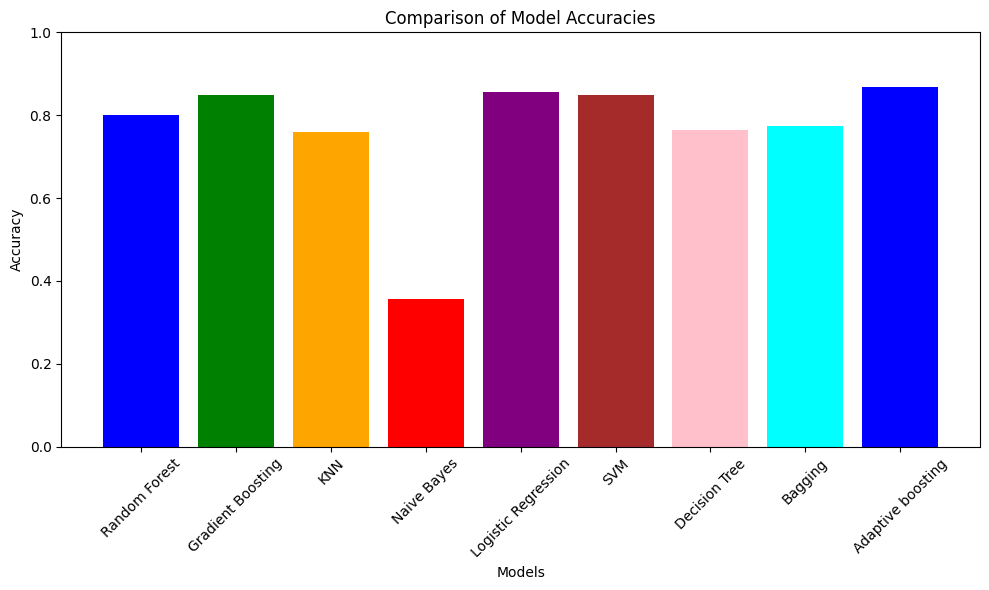

In [39]:
#model names and their accuracies
model_names = ['Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Adaptive boosting']
accuracies = [rf_accuracy, gb_accuracy, knn_accuracy, nb_accuracy, log_reg_accuracy, svm_accuracy, dt_accuracy, mean_bagging_accuracy, ada_accuracy]

plot.figure(figsize=(10, 6))
plot.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan'])
plot.xlabel('Models')
plot.ylabel('Accuracy')
plot.title('Comparison of Model Accuracies')
plot.ylim(0, 1)  #y-axis limit to ensure proper visualization of accuracy values
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

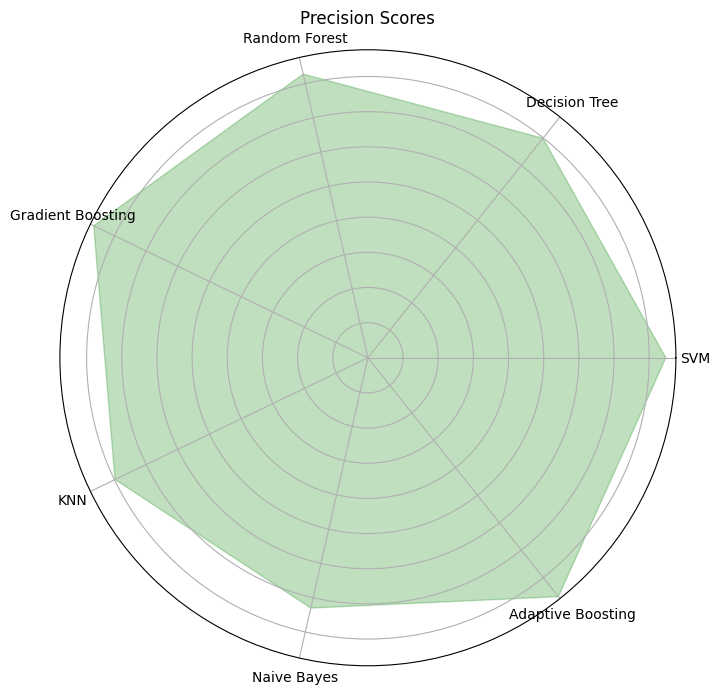

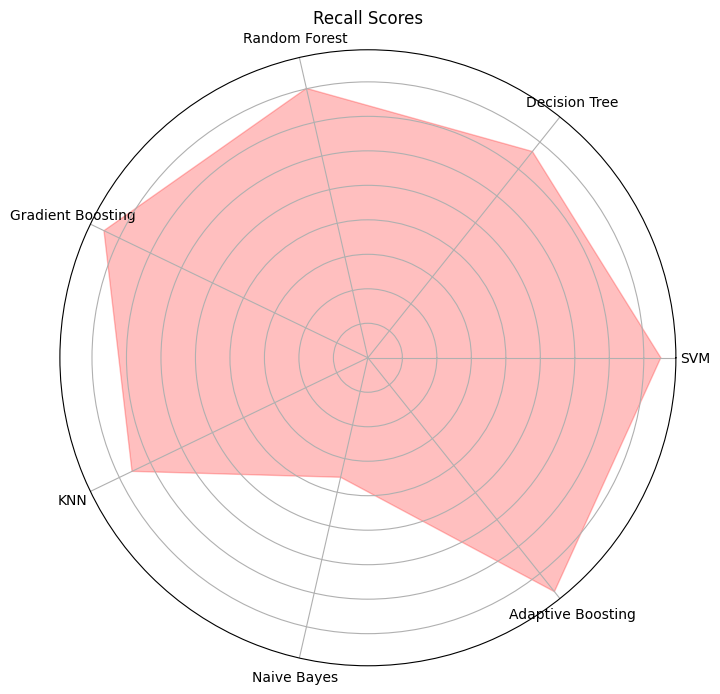

In [40]:
from sklearn.metrics import precision_score, recall_score

#precision scores
precision_scores = [precision_score(y_test, svm_pred, average='weighted', zero_division=0),
                    precision_score(y_test, dt_pred, average='weighted', zero_division=0),
                    precision_score(y_test, rf_pred, average='weighted', zero_division=0),
                    precision_score(y_test, gb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, knn_pred, average='weighted', zero_division=0),
                    precision_score(y_test, nb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)]
#recall scores
recall_scores = [recall_score(y_test, svm_pred, average='weighted', zero_division=0),
                 recall_score(y_test, dt_pred, average='weighted', zero_division=0),
                 recall_score(y_test, rf_pred, average='weighted', zero_division=0),
                 recall_score(y_test, gb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, knn_pred, average='weighted', zero_division=0),
                 recall_score(y_test, nb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, y_pred_ada, average='weighted', zero_division=0)]


#models
models = ['SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Adaptive Boosting']
num_models = len(models)

#angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_models, endpoint=False).tolist()

#radar chart is circular, so we need to "complete the loop" and append the start
precision_scores += precision_scores[:1]
recall_scores += recall_scores[:1]
angles += angles[:1]

#radar chart for precision
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, precision_scores, color='green', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Precision Scores')
plot.show()

#radar chart for recall
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, recall_scores, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Recall Scores')
plot.show()

In [41]:
from tabulate import tabulate

#data for table
data = [
    ["Logistic Regression", log_reg_accuracy],
    ["SVM", svm_accuracy],
    ["Decision Tree", dt_accuracy],
    ["Random Forest", rf_accuracy],
    ["Gradient Boosting", gb_accuracy],
    ["KNN", knn_accuracy],
    ["Naive Bayes", nb_accuracy],
    ["Bagging", mean_bagging_accuracy],
    ["Adaptive Boosting", ada_accuracy]
]

print(tabulate(data, headers=["Model", "Accuracy"]))

Model                  Accuracy
-------------------  ----------
Logistic Regression    0.855422
SVM                    0.849398
Decision Tree          0.76506
Random Forest          0.801205
Gradient Boosting      0.849398
KNN                    0.759036
Naive Bayes            0.355422
Bagging                0.773494
Adaptive Boosting      0.86747


# **Improvement level prediction - Anxiety for Song 1**

In [42]:
df_survey = df_survey.dropna()
columns_to_keep = ['Gender_Female','Gender_Male', 'Age', 'Listening_Frequency_s1', 'Anxiety_Level_Before_s1', 'Listening_conditions_s1_At Work', 'Listening_conditions_s1_During chores', 'Listening_conditions_s1_Sitting Alone', 'Listening_conditions_s1_Travelling']
X = df_survey[columns_to_keep]

In [43]:
#df_survey.info()

min_value = df_survey['Anxiety_Level_Improvement_s1'].min()
max_value = df_survey['Anxiety_Level_Improvement_s1'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: -1.6
Maximum value: 4.5


In [44]:
#define the bins and labels for categorization
bins = [-3, -1, 0, 1, 3, 5, 6]
labels = ['Moderate Decrease','Slight Decrease', 'Slight Increase','Moderate increase','High Increase', 'Very High Increase']

#create a new column with categorical labels based on the binning
df_survey['Anxiety_Level_Improvement_Category'] = pd.cut(df_survey['Anxiety_Level_Improvement_s1'], bins=bins, labels=labels)

#drop the original continuous column if no longer need
# df.drop(columns=['Anxiety_Level_Improvement_s1'], inplace=True)

print(df_survey[['Anxiety_Level_Improvement_s1', 'Anxiety_Level_Improvement_Category']].head())

y = df_survey['Anxiety_Level_Improvement_Category']


   Anxiety_Level_Improvement_s1 Anxiety_Level_Improvement_Category
0                           2.4                  Moderate increase
1                           0.6                    Slight Increase
2                           2.0                  Moderate increase
3                           0.7                    Slight Increase
4                           0.5                    Slight Increase


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiate StandardScaler
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation to  test data
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score

#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

#SVM
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#Decision Tree
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.8614457831325302
SVM Accuracy: 0.8313253012048193
Decision Tree Accuracy: 0.7951807228915663


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

#train models
random_forest.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)


rf_pred = random_forest.predict(X_test_scaled)
gb_pred = gradient_boosting.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = naive_bayes.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)


print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.8012048192771084
Gradient Boosting Accuracy: 0.8493975903614458
KNN Accuracy: 0.8313253012048193
Naive Bayes Accuracy: 0.6445783132530121


In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

#number of base classifiers (trees) in ensemble
num_base_classifiers = 5

#define classifiers
classifiers = [DecisionTreeClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]

#initialize list to store bagging classifiers
bagging_classifiers = []


for _ in range(num_base_classifiers):
    #create a bootstrap sample (subset with replacement) from training data
    X_boot, y_boot = resample(X_train_scaled, y_train, random_state=42)
    base_classifiers = []

    #initialize and train each classifier on bootstrap sample
    for classifier in classifiers:
        base_classifier = classifier
        base_classifier.fit(X_boot, y_boot)

        #add  trained base classifier to list
        base_classifiers.append(base_classifier)
    #initialize bagging classifier with base classifiers
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=num_base_classifiers)

    #trai bagging classifier
    bagging_classifier.fit(X_train_scaled, y_train)

    #add trained bagging classifier to list
    bagging_classifiers.append(bagging_classifier)

accuracies = []
#make predictions using each bagging classifier
for bagging_classifier in bagging_classifiers:
    predictions = bagging_classifier.predict(X_test_scaled)

    # accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)

#mean accuracy
mean_bagging_accuracy = np.mean(accuracies)
print("Mean Accuracy across Bagging Classifiers:", mean_bagging_accuracy)


Accuracy: 0.7951807228915663
Accuracy: 0.7771084337349398
Accuracy: 0.8253012048192772
Accuracy: 0.7951807228915663
Accuracy: 0.8132530120481928
Mean Accuracy across Bagging Classifiers: 0.8012048192771084


In [48]:
#adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

#initialize base estimators(classifiers)
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1)),
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC(kernel='linear'))
]

#initialize individual AdaBoost classifiers for each base estimator
ada_boost_estimators = [
    AdaBoostClassifier(base_estimator=estimator[1], n_estimators=50, learning_rate=1.0, random_state=42)
    for estimator in base_estimators
]

#combine AdaBoost classifiers using VotingClassifier
ada_boost = VotingClassifier(estimators=[(name, estimator) for name, estimator in base_estimators], voting='hard')

#train VotingClassifier
ada_boost.fit(X_train_scaled, y_train)

#predictions
y_pred_ada = ada_boost.predict(X_test_scaled)

#accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", ada_accuracy)

Accuracy: 0.8614457831325302


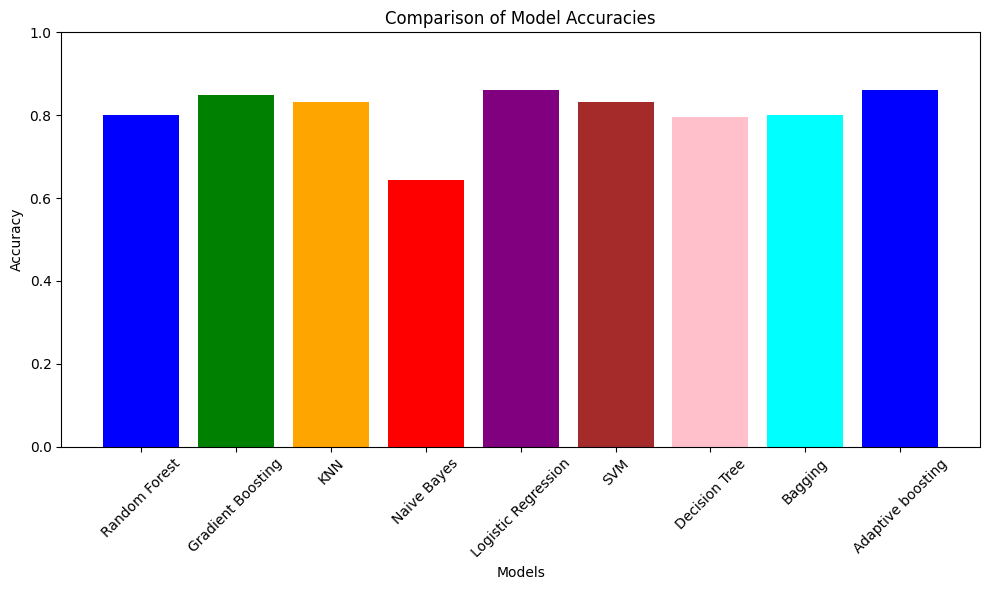

In [49]:
#model names and their accuracies
model_names = ['Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Adaptive boosting']
accuracies = [rf_accuracy, gb_accuracy, knn_accuracy, nb_accuracy, log_reg_accuracy, svm_accuracy, dt_accuracy, mean_bagging_accuracy, ada_accuracy]

plot.figure(figsize=(10, 6))
plot.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan'])
plot.xlabel('Models')
plot.ylabel('Accuracy')
plot.title('Comparison of Model Accuracies')
plot.ylim(0, 1)  #y-axis limit to ensure proper visualization of accuracy values
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

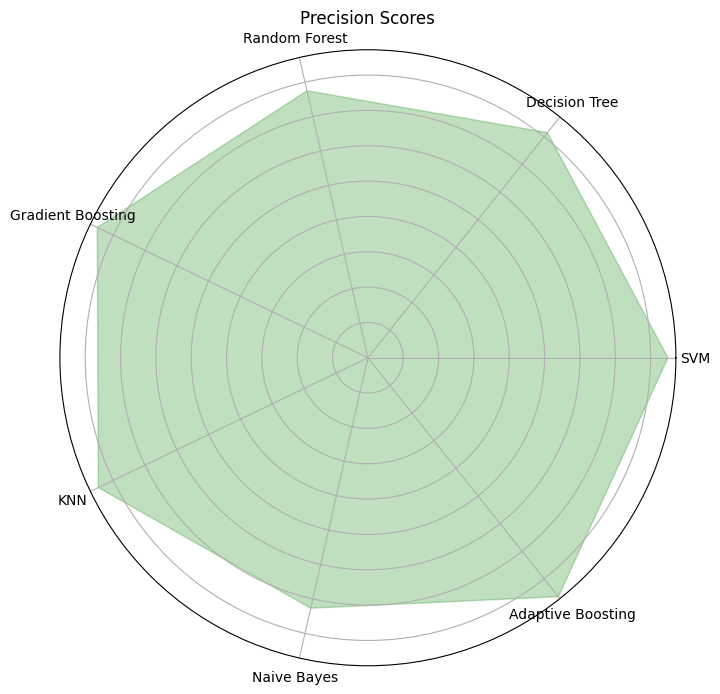

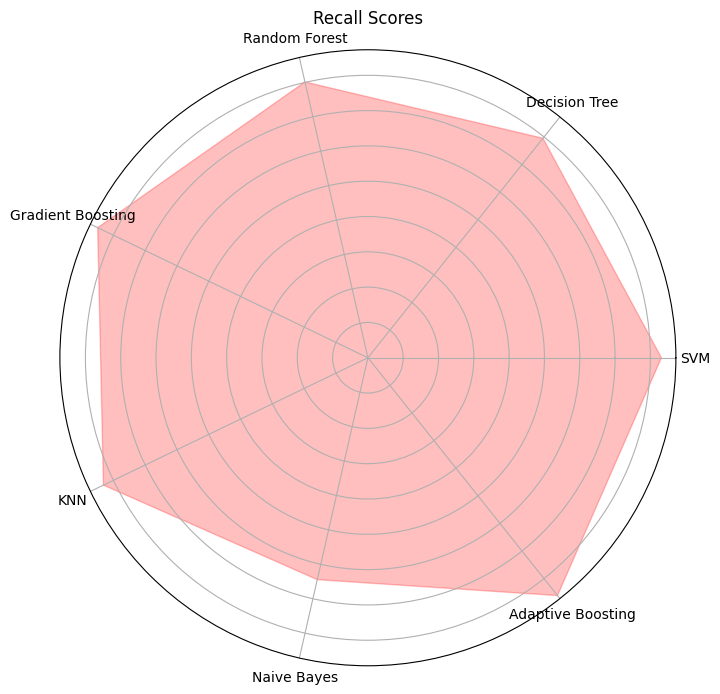

In [50]:
from sklearn.metrics import precision_score, recall_score

#precision scores
precision_scores = [precision_score(y_test, svm_pred, average='weighted', zero_division=0),
                    precision_score(y_test, dt_pred, average='weighted', zero_division=0),
                    precision_score(y_test, rf_pred, average='weighted', zero_division=0),
                    precision_score(y_test, gb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, knn_pred, average='weighted', zero_division=0),
                    precision_score(y_test, nb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)]
#recall scores
recall_scores = [recall_score(y_test, svm_pred, average='weighted', zero_division=0),
                 recall_score(y_test, dt_pred, average='weighted', zero_division=0),
                 recall_score(y_test, rf_pred, average='weighted', zero_division=0),
                 recall_score(y_test, gb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, knn_pred, average='weighted', zero_division=0),
                 recall_score(y_test, nb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, y_pred_ada, average='weighted', zero_division=0)]


#models
models = ['SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Adaptive Boosting']
num_models = len(models)

#angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_models, endpoint=False).tolist()

#radar chart is circular, so we need to "complete the loop" and append the start
precision_scores += precision_scores[:1]
recall_scores += recall_scores[:1]
angles += angles[:1]

#radar chart for precision
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, precision_scores, color='green', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Precision Scores')
plot.show()

#radar chart for recall
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, recall_scores, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Recall Scores')
plot.show()

In [51]:
from tabulate import tabulate

#data for table
data = [
    ["Logistic Regression", log_reg_accuracy],
    ["SVM", svm_accuracy],
    ["Decision Tree", dt_accuracy],
    ["Random Forest", rf_accuracy],
    ["Gradient Boosting", gb_accuracy],
    ["KNN", knn_accuracy],
    ["Naive Bayes", nb_accuracy],
    ["Bagging", mean_bagging_accuracy],
    ["Adaptive Boosting", ada_accuracy]
]

print(tabulate(data, headers=["Model", "Accuracy"]))

Model                  Accuracy
-------------------  ----------
Logistic Regression    0.861446
SVM                    0.831325
Decision Tree          0.795181
Random Forest          0.801205
Gradient Boosting      0.849398
KNN                    0.831325
Naive Bayes            0.644578
Bagging                0.801205
Adaptive Boosting      0.861446


# **Improvement level prediction - Depression for Song 1**

In [52]:
df_survey = df_survey.dropna()
columns_to_keep = ['Gender_Female','Gender_Male', 'Age', 'Listening_Frequency_s1', 'Depression_Level_Before_s1', 'Listening_conditions_s1_At Work', 'Listening_conditions_s1_During chores', 'Listening_conditions_s1_Sitting Alone', 'Listening_conditions_s1_Travelling']
X = df_survey[columns_to_keep]

In [53]:
#df_survey.info()

min_value = df_survey['Depression_Level_Improvement_s1'].min()
max_value = df_survey['Depression_Level_Improvement_s1'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: -1.5
Maximum value: 3.6


In [54]:
#define the bins and labels for categorization
bins = [-3, -1, 0, 1, 3, 5, 6]
labels = ['Moderate Decrease','Slight Decrease', 'Slight Increase','Moderate increase','High Increase', 'Very High Increase']

#create a new column with categorical labels based on the binning
df_survey['Depression_Level_Improvement_Category'] = pd.cut(df_survey['Depression_Level_Improvement_s1'], bins=bins, labels=labels)

#drop the original continuous column if no longer need
# df.drop(columns=['Depression_Level_Improvement_s1'], inplace=True)

print(df_survey[['Depression_Level_Improvement_s1', 'Depression_Level_Improvement_Category']].head())

y = df_survey['Depression_Level_Improvement_Category']


   Depression_Level_Improvement_s1 Depression_Level_Improvement_Category
0                              0.6                       Slight Increase
1                              0.6                       Slight Increase
2                              0.5                       Slight Increase
3                              0.7                       Slight Increase
4                             -0.5                       Slight Decrease


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiate StandardScaler
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation to  test data
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score

#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

#SVM
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#Decision Tree
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.8373493975903614
SVM Accuracy: 0.8554216867469879
Decision Tree Accuracy: 0.8192771084337349


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

#train models
random_forest.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)


rf_pred = random_forest.predict(X_test_scaled)
gb_pred = gradient_boosting.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = naive_bayes.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)


print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.8253012048192772
Gradient Boosting Accuracy: 0.8132530120481928
KNN Accuracy: 0.7951807228915663
Naive Bayes Accuracy: 0.5421686746987951


In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

#number of base classifiers (trees) in ensemble
num_base_classifiers = 5

#define classifiers
classifiers = [DecisionTreeClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]

#initialize list to store bagging classifiers
bagging_classifiers = []


for _ in range(num_base_classifiers):
    #create a bootstrap sample (subset with replacement) from training data
    X_boot, y_boot = resample(X_train_scaled, y_train, random_state=42)
    base_classifiers = []

    #initialize and train each classifier on bootstrap sample
    for classifier in classifiers:
        base_classifier = classifier
        base_classifier.fit(X_boot, y_boot)

        #add  trained base classifier to list
        base_classifiers.append(base_classifier)
    #initialize bagging classifier with base classifiers
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=num_base_classifiers)

    #trai bagging classifier
    bagging_classifier.fit(X_train_scaled, y_train)

    #add trained bagging classifier to list
    bagging_classifiers.append(bagging_classifier)

accuracies = []
#make predictions using each bagging classifier
for bagging_classifier in bagging_classifiers:
    predictions = bagging_classifier.predict(X_test_scaled)

    # accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)

#mean accuracy
mean_bagging_accuracy = np.mean(accuracies)
print("Mean Accuracy across Bagging Classifiers:", mean_bagging_accuracy)


Accuracy: 0.8072289156626506
Accuracy: 0.7831325301204819
Accuracy: 0.7951807228915663
Accuracy: 0.8072289156626506
Accuracy: 0.7891566265060241
Mean Accuracy across Bagging Classifiers: 0.7963855421686746


In [58]:
#adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

#initialize base estimators(classifiers)
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1)),
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC(kernel='linear'))
]

#initialize individual AdaBoost classifiers for each base estimator
ada_boost_estimators = [
    AdaBoostClassifier(base_estimator=estimator[1], n_estimators=50, learning_rate=1.0, random_state=42)
    for estimator in base_estimators
]

#combine AdaBoost classifiers using VotingClassifier
ada_boost = VotingClassifier(estimators=[(name, estimator) for name, estimator in base_estimators], voting='hard')

#train VotingClassifier
ada_boost.fit(X_train_scaled, y_train)

#predictions
y_pred_ada = ada_boost.predict(X_test_scaled)

#accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", ada_accuracy)

Accuracy: 0.8493975903614458


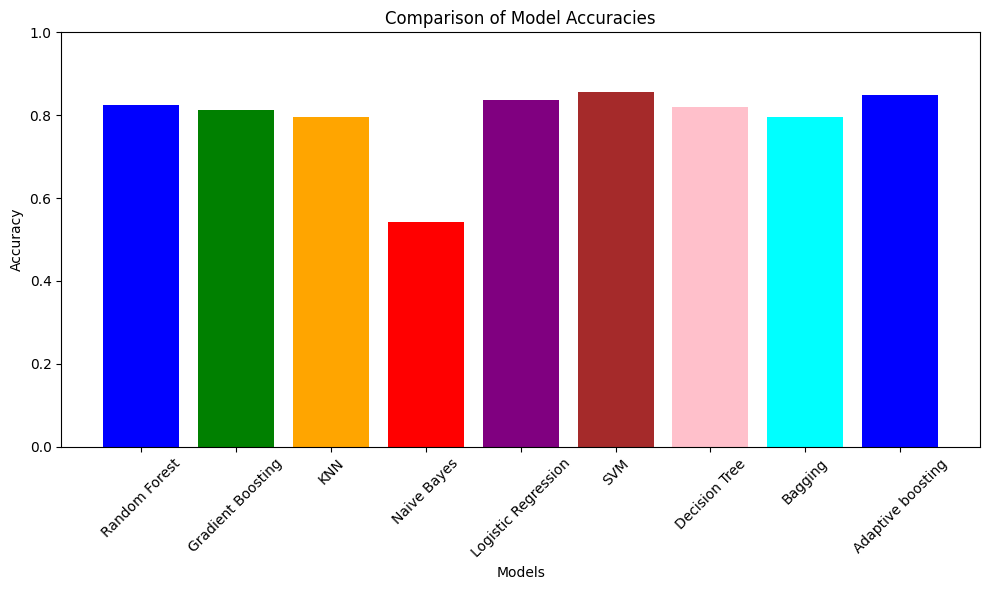

In [59]:
#model names and their accuracies
model_names = ['Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Adaptive boosting']
accuracies = [rf_accuracy, gb_accuracy, knn_accuracy, nb_accuracy, log_reg_accuracy, svm_accuracy, dt_accuracy, mean_bagging_accuracy, ada_accuracy]

plot.figure(figsize=(10, 6))
plot.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan'])
plot.xlabel('Models')
plot.ylabel('Accuracy')
plot.title('Comparison of Model Accuracies')
plot.ylim(0, 1)  #y-axis limit to ensure proper visualization of accuracy values
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

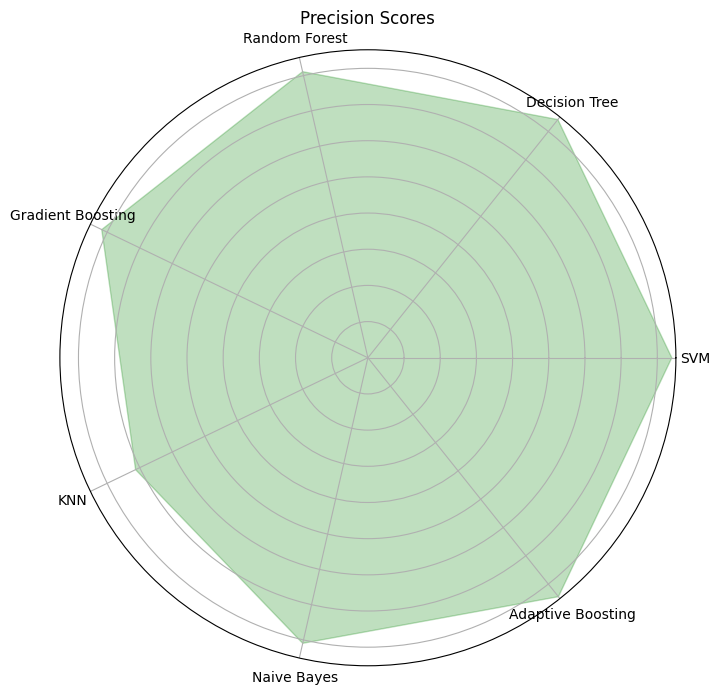

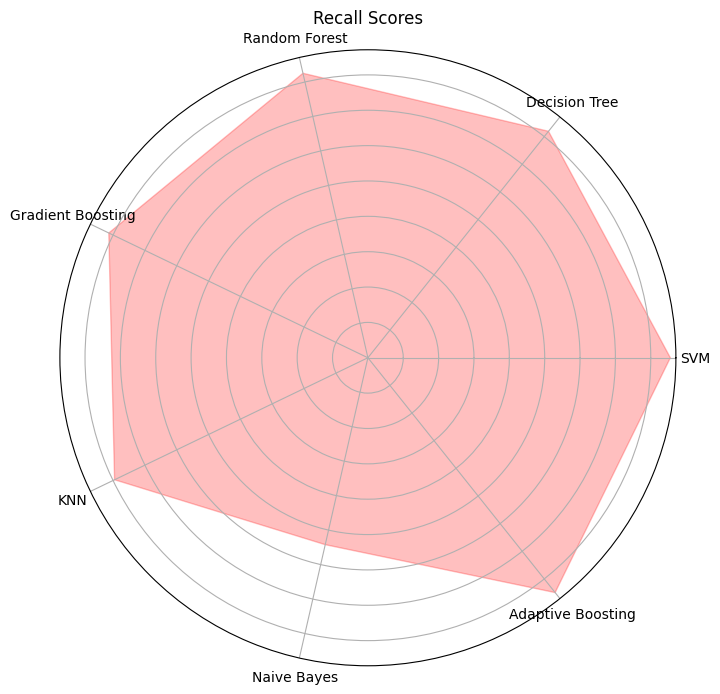

In [60]:
from sklearn.metrics import precision_score, recall_score

#precision scores
precision_scores = [precision_score(y_test, svm_pred, average='weighted', zero_division=0),
                    precision_score(y_test, dt_pred, average='weighted', zero_division=0),
                    precision_score(y_test, rf_pred, average='weighted', zero_division=0),
                    precision_score(y_test, gb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, knn_pred, average='weighted', zero_division=0),
                    precision_score(y_test, nb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)]
#recall scores
recall_scores = [recall_score(y_test, svm_pred, average='weighted', zero_division=0),
                 recall_score(y_test, dt_pred, average='weighted', zero_division=0),
                 recall_score(y_test, rf_pred, average='weighted', zero_division=0),
                 recall_score(y_test, gb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, knn_pred, average='weighted', zero_division=0),
                 recall_score(y_test, nb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, y_pred_ada, average='weighted', zero_division=0)]


#models
models = ['SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Adaptive Boosting']
num_models = len(models)

#angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_models, endpoint=False).tolist()

#radar chart is circular, so we need to "complete the loop" and append the start
precision_scores += precision_scores[:1]
recall_scores += recall_scores[:1]
angles += angles[:1]

#radar chart for precision
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, precision_scores, color='green', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Precision Scores')
plot.show()

#radar chart for recall
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, recall_scores, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Recall Scores')
plot.show()

In [61]:
from tabulate import tabulate

#data for table
data = [
    ["Logistic Regression", log_reg_accuracy],
    ["SVM", svm_accuracy],
    ["Decision Tree", dt_accuracy],
    ["Random Forest", rf_accuracy],
    ["Gradient Boosting", gb_accuracy],
    ["KNN", knn_accuracy],
    ["Naive Bayes", nb_accuracy],
    ["Bagging", mean_bagging_accuracy],
    ["Adaptive Boosting", ada_accuracy]
]

print(tabulate(data, headers=["Model", "Accuracy"]))

Model                  Accuracy
-------------------  ----------
Logistic Regression    0.837349
SVM                    0.855422
Decision Tree          0.819277
Random Forest          0.825301
Gradient Boosting      0.813253
KNN                    0.795181
Naive Bayes            0.542169
Bagging                0.796386
Adaptive Boosting      0.849398


# **Improvement level prediction - Stress for Song 2**

In [62]:
df_survey = df_survey.dropna()
columns_to_keep = ['Gender_Female','Gender_Male', 'Age', 'Listening_Frequency_s2', 'Stress_Level_Before_s2', 'Listening_conditions_s2_At Work', 'Listening_conditions_s2_During chores', 'Listening_conditions_s2_Sitting Alone', 'Listening_conditions_s2_Travelling']
X = df_survey[columns_to_keep]

In [63]:
#df_survey.info()

min_value = df_survey['Stress_Level_Improvement_s2'].min()
max_value = df_survey['Stress_Level_Improvement_s2'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: -2.4
Maximum value: 1.8


In [64]:
#define the bins and labels for categorization
bins = [-3, -1, 0, 1, 3, 5, 6]
labels = ['Moderate Decrease','Slight Decrease', 'Slight Increase','Moderate increase','High Increase', 'Very High Increase']

#create a new column with categorical labels based on the binning
df_survey['Stress_Level_Improvement_Category'] = pd.cut(df_survey['Stress_Level_Improvement_s2'], bins=bins, labels=labels)

#drop the original continuous column if no longer need
# df.drop(columns=['Stress_Level_Improvement_s2'], inplace=True)

print(df_survey[['Stress_Level_Improvement_s2', 'Stress_Level_Improvement_Category']].head())

y = df_survey['Stress_Level_Improvement_Category']


   Stress_Level_Improvement_s2 Stress_Level_Improvement_Category
0                         -0.6                   Slight Decrease
1                         -0.8                   Slight Decrease
2                         -0.7                   Slight Decrease
3                         -0.5                   Slight Decrease
4                          0.0                   Slight Decrease


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiate StandardScaler
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation to  test data
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score

#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

#SVM
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#Decision Tree
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.8674698795180723
SVM Accuracy: 0.8734939759036144
Decision Tree Accuracy: 0.8192771084337349


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

#train models
random_forest.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)


rf_pred = random_forest.predict(X_test_scaled)
gb_pred = gradient_boosting.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = naive_bayes.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)


print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.8493975903614458
Gradient Boosting Accuracy: 0.8433734939759037
KNN Accuracy: 0.8554216867469879
Naive Bayes Accuracy: 0.29518072289156627


In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

#number of base classifiers (trees) in ensemble
num_base_classifiers = 5

#define classifiers
classifiers = [DecisionTreeClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]

#initialize list to store bagging classifiers
bagging_classifiers = []


for _ in range(num_base_classifiers):
    #create a bootstrap sample (subset with replacement) from training data
    X_boot, y_boot = resample(X_train_scaled, y_train, random_state=42)
    base_classifiers = []

    #initialize and train each classifier on bootstrap sample
    for classifier in classifiers:
        base_classifier = classifier
        base_classifier.fit(X_boot, y_boot)

        #add  trained base classifier to list
        base_classifiers.append(base_classifier)
    #initialize bagging classifier with base classifiers
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=num_base_classifiers)

    #trai bagging classifier
    bagging_classifier.fit(X_train_scaled, y_train)

    #add trained bagging classifier to list
    bagging_classifiers.append(bagging_classifier)

accuracies = []
#make predictions using each bagging classifier
for bagging_classifier in bagging_classifiers:
    predictions = bagging_classifier.predict(X_test_scaled)

    # accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)

#mean accuracy
mean_bagging_accuracy = np.mean(accuracies)
print("Mean Accuracy across Bagging Classifiers:", mean_bagging_accuracy)


Accuracy: 0.8614457831325302
Accuracy: 0.8493975903614458
Accuracy: 0.8614457831325302
Accuracy: 0.8674698795180723
Accuracy: 0.8674698795180723
Mean Accuracy across Bagging Classifiers: 0.8614457831325302


In [68]:
#adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

#initialize base estimators(classifiers)
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1)),
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC(kernel='linear'))
]

#initialize individual AdaBoost classifiers for each base estimator
ada_boost_estimators = [
    AdaBoostClassifier(base_estimator=estimator[1], n_estimators=50, learning_rate=1.0, random_state=42)
    for estimator in base_estimators
]

#combine AdaBoost classifiers using VotingClassifier
ada_boost = VotingClassifier(estimators=[(name, estimator) for name, estimator in base_estimators], voting='hard')

#train VotingClassifier
ada_boost.fit(X_train_scaled, y_train)

#predictions
y_pred_ada = ada_boost.predict(X_test_scaled)

#accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", ada_accuracy)

Accuracy: 0.8734939759036144


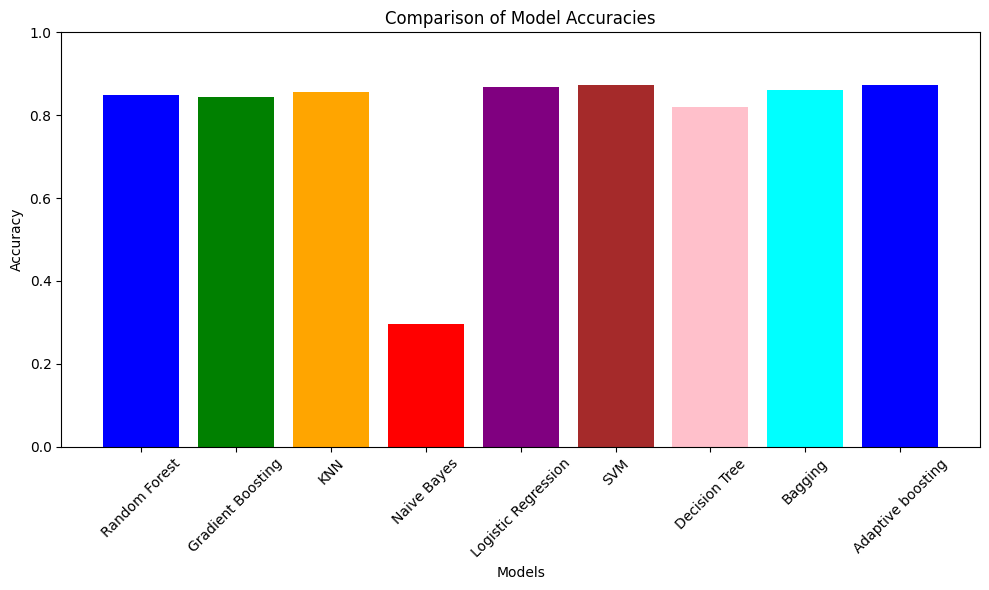

In [69]:
#model names and their accuracies
model_names = ['Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Adaptive boosting']
accuracies = [rf_accuracy, gb_accuracy, knn_accuracy, nb_accuracy, log_reg_accuracy, svm_accuracy, dt_accuracy, mean_bagging_accuracy, ada_accuracy]

plot.figure(figsize=(10, 6))
plot.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan'])
plot.xlabel('Models')
plot.ylabel('Accuracy')
plot.title('Comparison of Model Accuracies')
plot.ylim(0, 1)  #y-axis limit to ensure proper visualization of accuracy values
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

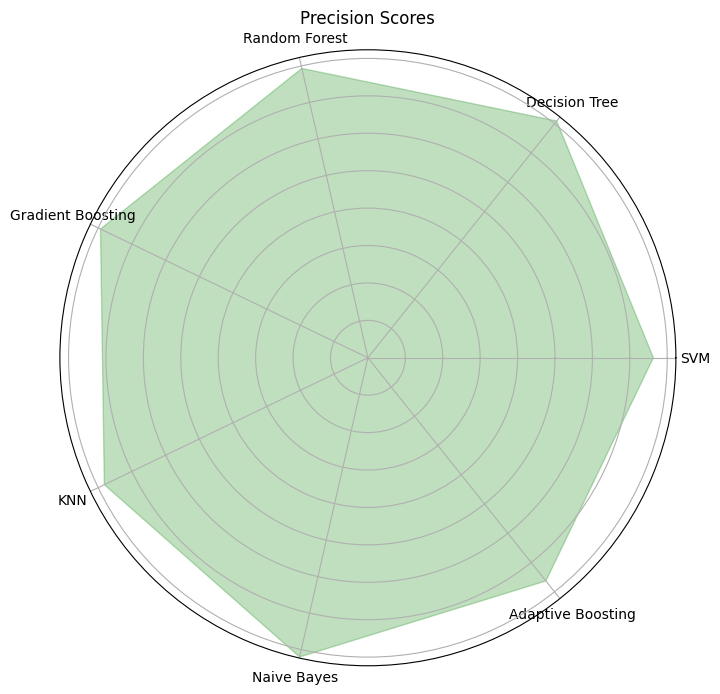

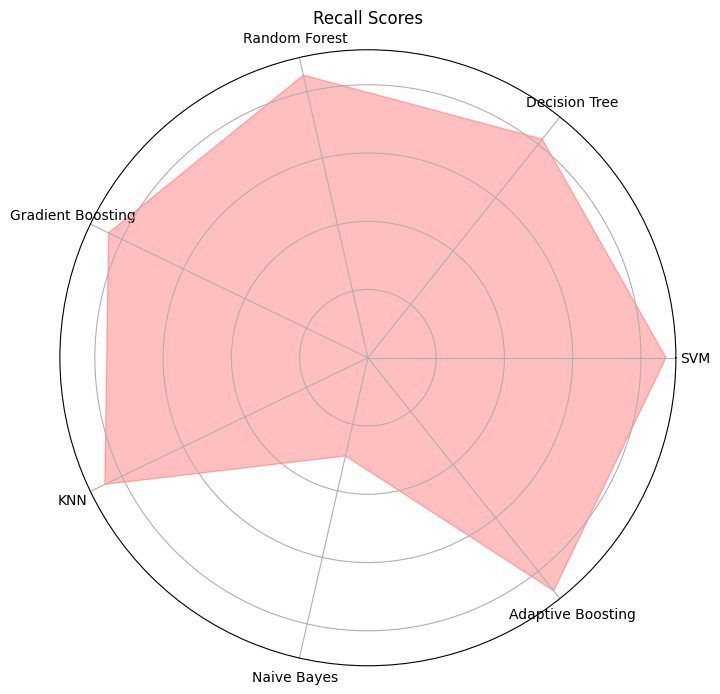

In [70]:
from sklearn.metrics import precision_score, recall_score

#precision scores
precision_scores = [precision_score(y_test, svm_pred, average='weighted', zero_division=0),
                    precision_score(y_test, dt_pred, average='weighted', zero_division=0),
                    precision_score(y_test, rf_pred, average='weighted', zero_division=0),
                    precision_score(y_test, gb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, knn_pred, average='weighted', zero_division=0),
                    precision_score(y_test, nb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)]
#recall scores
recall_scores = [recall_score(y_test, svm_pred, average='weighted'),
                 recall_score(y_test, dt_pred, average='weighted'),
                 recall_score(y_test, rf_pred, average='weighted'),
                 recall_score(y_test, gb_pred, average='weighted'),
                 recall_score(y_test, knn_pred, average='weighted'),
                 recall_score(y_test, nb_pred, average='weighted'),
                 recall_score(y_test, y_pred_ada, average='weighted')]


#models
models = ['SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Adaptive Boosting']
num_models = len(models)

#angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_models, endpoint=False).tolist()

#radar chart is circular, so we need to "complete the loop" and append the start
precision_scores += precision_scores[:1]
recall_scores += recall_scores[:1]
angles += angles[:1]

#radar chart for precision
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, precision_scores, color='green', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Precision Scores')
plot.show()

#radar chart for recall
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, recall_scores, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Recall Scores')
plot.show()

In [71]:
from tabulate import tabulate

#data for table
data = [
    ["Logistic Regression", log_reg_accuracy],
    ["SVM", svm_accuracy],
    ["Decision Tree", dt_accuracy],
    ["Random Forest", rf_accuracy],
    ["Gradient Boosting", gb_accuracy],
    ["KNN", knn_accuracy],
    ["Naive Bayes", nb_accuracy],
    ["Bagging", mean_bagging_accuracy],
    ["Adaptive Boosting", ada_accuracy]
]

print(tabulate(data, headers=["Model", "Accuracy"]))

Model                  Accuracy
-------------------  ----------
Logistic Regression    0.86747
SVM                    0.873494
Decision Tree          0.819277
Random Forest          0.849398
Gradient Boosting      0.843373
KNN                    0.855422
Naive Bayes            0.295181
Bagging                0.861446
Adaptive Boosting      0.873494


# **Improvement level prediction - Anxiety for Song 2**

In [72]:
df_survey = df_survey.dropna()
columns_to_keep = ['Gender_Female','Gender_Male', 'Age', 'Listening_Frequency_s2', 'Anxiety_Level_Before_s2', 'Listening_conditions_s2_At Work', 'Listening_conditions_s2_During chores', 'Listening_conditions_s2_Sitting Alone', 'Listening_conditions_s2_Travelling']
X = df_survey[columns_to_keep]

In [73]:
#df_survey.info()

min_value = df_survey['Anxiety_Level_Improvement_s2'].min()
max_value = df_survey['Anxiety_Level_Improvement_s2'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: -2.1
Maximum value: 1.4


In [74]:
#define the bins and labels for categorization
bins = [-3, -1, 0, 1, 3, 5, 6]
labels = ['Moderate Decrease','Slight Decrease', 'Slight Increase','Moderate increase','High Increase', 'Very High Increase']

#create a new column with categorical labels based on the binning
df_survey['Anxiety_Level_Improvement_Category'] = pd.cut(df_survey['Anxiety_Level_Improvement_s2'], bins=bins, labels=labels)

#drop the original continuous column if no longer need
# df.drop(columns=['Anxiety_Level_Improvement_s2'], inplace=True)

print(df_survey[['Anxiety_Level_Improvement_s2', 'Anxiety_Level_Improvement_Category']].head())

y = df_survey['Anxiety_Level_Improvement_Category']


   Anxiety_Level_Improvement_s2 Anxiety_Level_Improvement_Category
0                          -0.6                    Slight Decrease
1                          -1.2                  Moderate Decrease
2                          -0.7                    Slight Decrease
3                          -1.5                  Moderate Decrease
4                          -0.2                    Slight Decrease


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiate StandardScaler
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation to  test data
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score

#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

#SVM
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#Decision Tree
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.8674698795180723
SVM Accuracy: 0.8674698795180723
Decision Tree Accuracy: 0.8072289156626506


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

#train models
random_forest.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)


rf_pred = random_forest.predict(X_test_scaled)
gb_pred = gradient_boosting.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = naive_bayes.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)


print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.8373493975903614
Gradient Boosting Accuracy: 0.8373493975903614
KNN Accuracy: 0.8313253012048193
Naive Bayes Accuracy: 0.7891566265060241


In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

#number of base classifiers (trees) in ensemble
num_base_classifiers = 5

#define classifiers
classifiers = [DecisionTreeClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]

#initialize list to store bagging classifiers
bagging_classifiers = []


for _ in range(num_base_classifiers):
    #create a bootstrap sample (subset with replacement) from training data
    X_boot, y_boot = resample(X_train_scaled, y_train, random_state=42)
    base_classifiers = []

    #initialize and train each classifier on bootstrap sample
    for classifier in classifiers:
        base_classifier = classifier
        base_classifier.fit(X_boot, y_boot)

        #add  trained base classifier to list
        base_classifiers.append(base_classifier)
    #initialize bagging classifier with base classifiers
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=num_base_classifiers)

    #trai bagging classifier
    bagging_classifier.fit(X_train_scaled, y_train)

    #add trained bagging classifier to list
    bagging_classifiers.append(bagging_classifier)

accuracies = []
#make predictions using each bagging classifier
for bagging_classifier in bagging_classifiers:
    predictions = bagging_classifier.predict(X_test_scaled)

    # accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)

#mean accuracy
mean_bagging_accuracy = np.mean(accuracies)
print("Mean Accuracy across Bagging Classifiers:", mean_bagging_accuracy)


Accuracy: 0.8132530120481928
Accuracy: 0.8253012048192772
Accuracy: 0.8373493975903614
Accuracy: 0.8433734939759037
Accuracy: 0.8433734939759037
Mean Accuracy across Bagging Classifiers: 0.8325301204819275


In [78]:
#adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

#initialize base estimators(classifiers)
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1)),
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC(kernel='linear'))
]

#initialize individual AdaBoost classifiers for each base estimator
ada_boost_estimators = [
    AdaBoostClassifier(base_estimator=estimator[1], n_estimators=50, learning_rate=1.0, random_state=42)
    for estimator in base_estimators
]

#combine AdaBoost classifiers using VotingClassifier
ada_boost = VotingClassifier(estimators=[(name, estimator) for name, estimator in base_estimators], voting='hard')

#train VotingClassifier
ada_boost.fit(X_train_scaled, y_train)

#predictions
y_pred_ada = ada_boost.predict(X_test_scaled)

#accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", ada_accuracy)

Accuracy: 0.8674698795180723


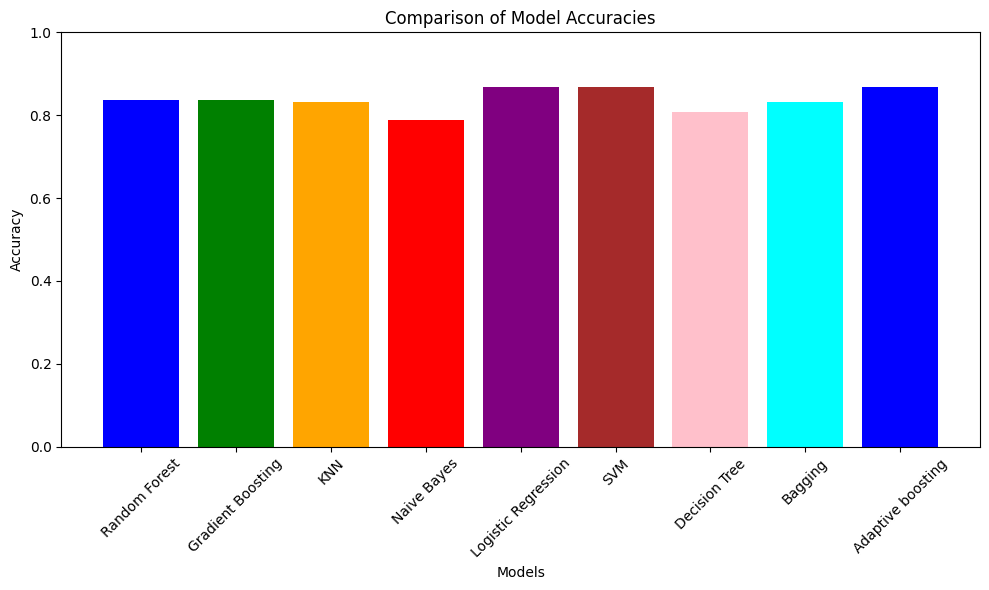

In [79]:
#model names and their accuracies
model_names = ['Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Adaptive boosting']
accuracies = [rf_accuracy, gb_accuracy, knn_accuracy, nb_accuracy, log_reg_accuracy, svm_accuracy, dt_accuracy, mean_bagging_accuracy, ada_accuracy]

plot.figure(figsize=(10, 6))
plot.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan'])
plot.xlabel('Models')
plot.ylabel('Accuracy')
plot.title('Comparison of Model Accuracies')
plot.ylim(0, 1)  #y-axis limit to ensure proper visualization of accuracy values
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

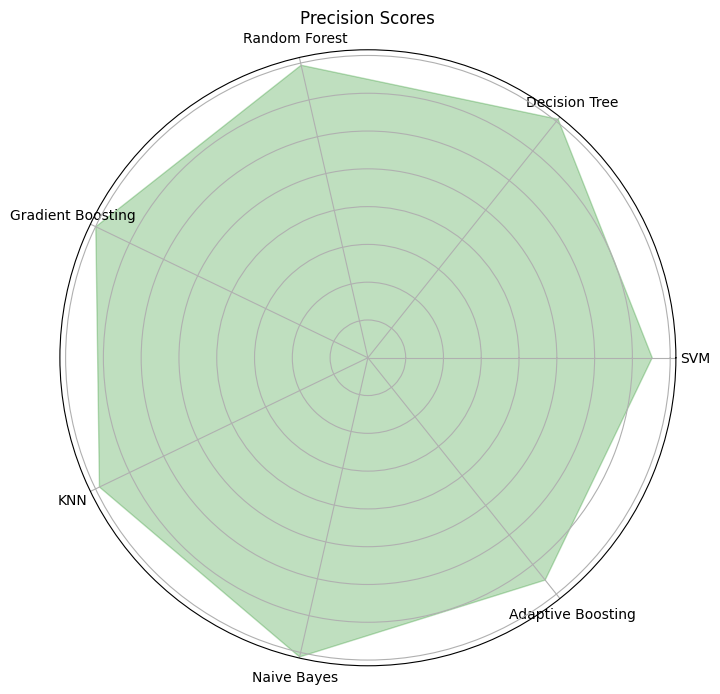

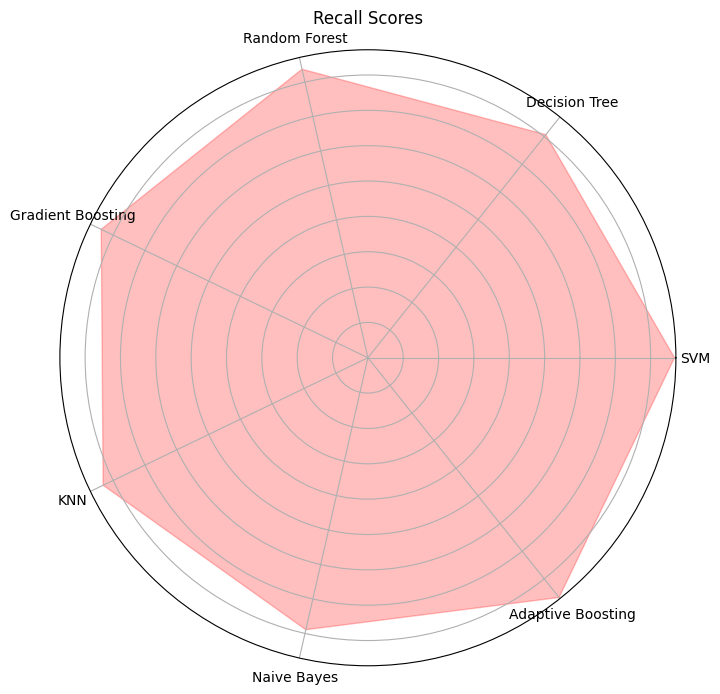

In [80]:
from sklearn.metrics import precision_score, recall_score

#precision scores
precision_scores = [precision_score(y_test, svm_pred, average='weighted', zero_division=0),
                    precision_score(y_test, dt_pred, average='weighted', zero_division=0),
                    precision_score(y_test, rf_pred, average='weighted', zero_division=0),
                    precision_score(y_test, gb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, knn_pred, average='weighted', zero_division=0),
                    precision_score(y_test, nb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)]
#recall scores
recall_scores = [recall_score(y_test, svm_pred, average='weighted', zero_division=0),
                 recall_score(y_test, dt_pred, average='weighted', zero_division=0),
                 recall_score(y_test, rf_pred, average='weighted', zero_division=0),
                 recall_score(y_test, gb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, knn_pred, average='weighted', zero_division=0),
                 recall_score(y_test, nb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, y_pred_ada, average='weighted', zero_division=0)]


#models
models = ['SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Adaptive Boosting']
num_models = len(models)

#angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_models, endpoint=False).tolist()

#radar chart is circular, so we need to "complete the loop" and append the start
precision_scores += precision_scores[:1]
recall_scores += recall_scores[:1]
angles += angles[:1]

#radar chart for precision
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, precision_scores, color='green', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Precision Scores')
plot.show()

#radar chart for recall
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, recall_scores, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Recall Scores')
plot.show()

In [81]:
from tabulate import tabulate

#data for table
data = [
    ["Logistic Regression", log_reg_accuracy],
    ["SVM", svm_accuracy],
    ["Decision Tree", dt_accuracy],
    ["Random Forest", rf_accuracy],
    ["Gradient Boosting", gb_accuracy],
    ["KNN", knn_accuracy],
    ["Naive Bayes", nb_accuracy],
    ["Bagging", mean_bagging_accuracy],
    ["Adaptive Boosting", ada_accuracy]
]

print(tabulate(data, headers=["Model", "Accuracy"]))

Model                  Accuracy
-------------------  ----------
Logistic Regression    0.86747
SVM                    0.86747
Decision Tree          0.807229
Random Forest          0.837349
Gradient Boosting      0.837349
KNN                    0.831325
Naive Bayes            0.789157
Bagging                0.83253
Adaptive Boosting      0.86747


# **Improvement level prediction - Depression for Song 2**

In [82]:
df_survey = df_survey.dropna()
columns_to_keep = ['Gender_Female','Gender_Male', 'Age', 'Listening_Frequency_s2', 'Depression_Level_Before_s2', 'Listening_conditions_s2_At Work', 'Listening_conditions_s2_During chores', 'Listening_conditions_s2_Sitting Alone', 'Listening_conditions_s2_Travelling']
X = df_survey[columns_to_keep]

In [83]:
#df_survey.info()

min_value = df_survey['Depression_Level_Improvement_s2'].min()
max_value = df_survey['Depression_Level_Improvement_s2'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: -3.6
Maximum value: 2.4


In [84]:
#define the bins and labels for categorization
bins = [-4, -3, -1, 0, 1, 3, 5, 6]
labels = ['High Decrease', 'Moderate Decrease','Slight Decrease', 'Slight Increase','Moderate increase','High Increase', 'Very High Increase']

#create a new column with categorical labels based on the binning
df_survey['Depression_Level_Improvement_Category'] = pd.cut(df_survey['Depression_Level_Improvement_s2'], bins=bins, labels=labels)

#drop the original continuous column if no longer need
# df.drop(columns=['Depression_Level_Improvement_s2'], inplace=True)

print(df_survey[['Depression_Level_Improvement_s2', 'Depression_Level_Improvement_Category']].head())

y = df_survey['Depression_Level_Improvement_Category']


   Depression_Level_Improvement_s2 Depression_Level_Improvement_Category
0                             -0.6                       Slight Decrease
1                             -0.4                       Slight Decrease
2                             -0.7                       Slight Decrease
3                             -0.5                       Slight Decrease
4                              0.0                       Slight Decrease


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiate StandardScaler
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation to  test data
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score

#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

#SVM
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#Decision Tree
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.7349397590361446
SVM Accuracy: 0.7289156626506024
Decision Tree Accuracy: 0.7168674698795181


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

#train models
random_forest.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)


rf_pred = random_forest.predict(X_test_scaled)
gb_pred = gradient_boosting.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = naive_bayes.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)


print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.6987951807228916
Gradient Boosting Accuracy: 0.7710843373493976
KNN Accuracy: 0.7530120481927711
Naive Bayes Accuracy: 0.2289156626506024


In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

#number of base classifiers (trees) in ensemble
num_base_classifiers = 5

#define classifiers
classifiers = [DecisionTreeClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]

#initialize list to store bagging classifiers
bagging_classifiers = []


for _ in range(num_base_classifiers):
    #create a bootstrap sample (subset with replacement) from training data
    X_boot, y_boot = resample(X_train_scaled, y_train, random_state=42)
    base_classifiers = []

    #initialize and train each classifier on bootstrap sample
    for classifier in classifiers:
        base_classifier = classifier
        base_classifier.fit(X_boot, y_boot)

        #add  trained base classifier to list
        base_classifiers.append(base_classifier)
    #initialize bagging classifier with base classifiers
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=num_base_classifiers)

    #trai bagging classifier
    bagging_classifier.fit(X_train_scaled, y_train)

    #add trained bagging classifier to list
    bagging_classifiers.append(bagging_classifier)

accuracies = []
#make predictions using each bagging classifier
for bagging_classifier in bagging_classifiers:
    predictions = bagging_classifier.predict(X_test_scaled)

    # accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)

#mean accuracy
mean_bagging_accuracy = np.mean(accuracies)
print("Mean Accuracy across Bagging Classifiers:", mean_bagging_accuracy)


Accuracy: 0.7469879518072289
Accuracy: 0.7530120481927711
Accuracy: 0.7289156626506024
Accuracy: 0.7530120481927711
Accuracy: 0.7469879518072289
Mean Accuracy across Bagging Classifiers: 0.7457831325301205


In [88]:
#adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

#initialize base estimators(classifiers)
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1)),
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC(kernel='linear'))
]

#initialize individual AdaBoost classifiers for each base estimator
ada_boost_estimators = [
    AdaBoostClassifier(base_estimator=estimator[1], n_estimators=50, learning_rate=1.0, random_state=42)
    for estimator in base_estimators
]

#combine AdaBoost classifiers using VotingClassifier
ada_boost = VotingClassifier(estimators=[(name, estimator) for name, estimator in base_estimators], voting='hard')

#train VotingClassifier
ada_boost.fit(X_train_scaled, y_train)

#predictions
y_pred_ada = ada_boost.predict(X_test_scaled)

#accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", ada_accuracy)

Accuracy: 0.7289156626506024


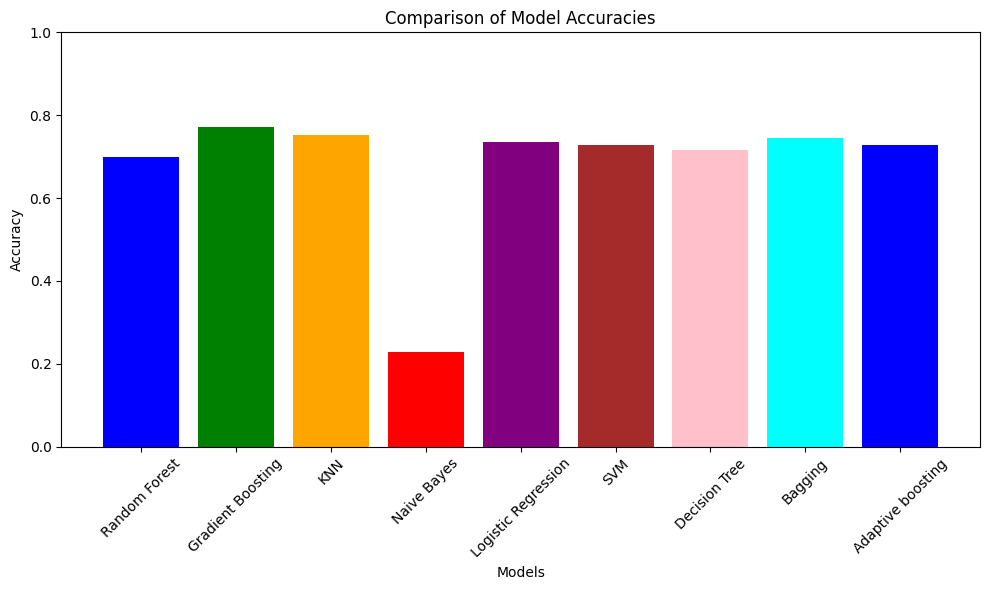

In [89]:
#model names and their accuracies
model_names = ['Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Adaptive boosting']
accuracies = [rf_accuracy, gb_accuracy, knn_accuracy, nb_accuracy, log_reg_accuracy, svm_accuracy, dt_accuracy, mean_bagging_accuracy, ada_accuracy]

plot.figure(figsize=(10, 6))
plot.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan'])
plot.xlabel('Models')
plot.ylabel('Accuracy')
plot.title('Comparison of Model Accuracies')
plot.ylim(0, 1)  #y-axis limit to ensure proper visualization of accuracy values
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

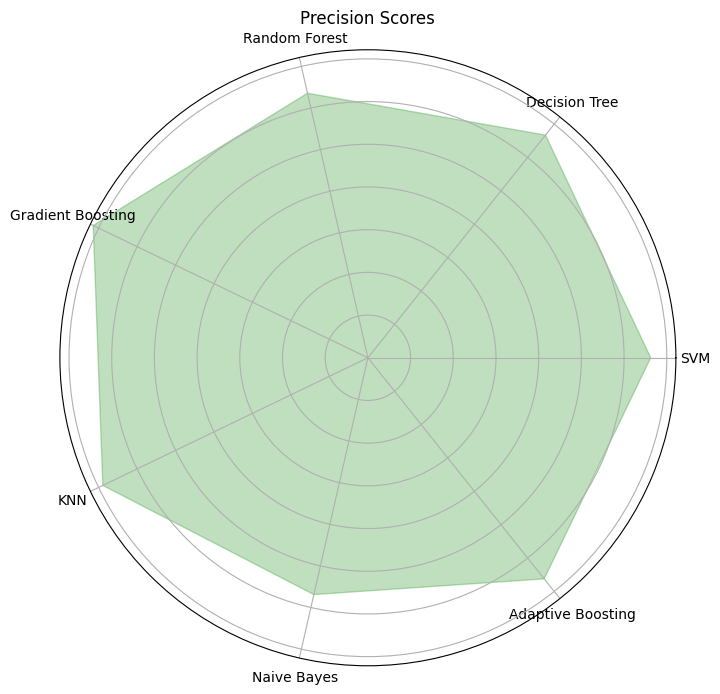

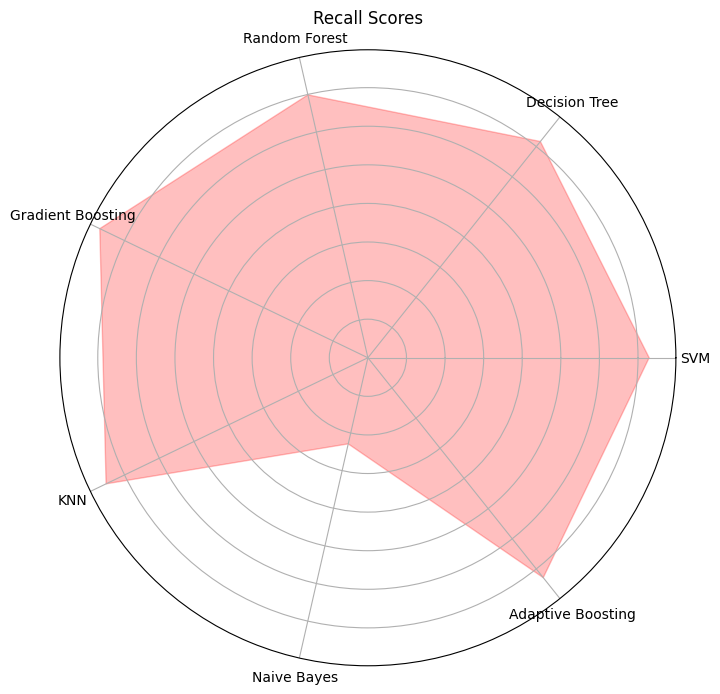

In [90]:
from sklearn.metrics import precision_score, recall_score

#precision scores
precision_scores = [precision_score(y_test, svm_pred, average='weighted', zero_division=0),
                    precision_score(y_test, dt_pred, average='weighted', zero_division=0),
                    precision_score(y_test, rf_pred, average='weighted', zero_division=0),
                    precision_score(y_test, gb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, knn_pred, average='weighted', zero_division=0),
                    precision_score(y_test, nb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)]
#recall scores
recall_scores = [recall_score(y_test, svm_pred, average='weighted'),
                 recall_score(y_test, dt_pred, average='weighted'),
                 recall_score(y_test, rf_pred, average='weighted'),
                 recall_score(y_test, gb_pred, average='weighted'),
                 recall_score(y_test, knn_pred, average='weighted'),
                 recall_score(y_test, nb_pred, average='weighted'),
                 recall_score(y_test, y_pred_ada, average='weighted')]


#models
models = ['SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Adaptive Boosting']
num_models = len(models)

#angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_models, endpoint=False).tolist()

#radar chart is circular, so we need to "complete the loop" and append the start
precision_scores += precision_scores[:1]
recall_scores += recall_scores[:1]
angles += angles[:1]

#radar chart for precision
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, precision_scores, color='green', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Precision Scores')
plot.show()

#radar chart for recall
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, recall_scores, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Recall Scores')
plot.show()

In [91]:
from tabulate import tabulate

#data for table
data = [
    ["Logistic Regression", log_reg_accuracy],
    ["SVM", svm_accuracy],
    ["Decision Tree", dt_accuracy],
    ["Random Forest", rf_accuracy],
    ["Gradient Boosting", gb_accuracy],
    ["KNN", knn_accuracy],
    ["Naive Bayes", nb_accuracy],
    ["Bagging", mean_bagging_accuracy],
    ["Adaptive Boosting", ada_accuracy]
]

print(tabulate(data, headers=["Model", "Accuracy"]))

Model                  Accuracy
-------------------  ----------
Logistic Regression    0.73494
SVM                    0.728916
Decision Tree          0.716867
Random Forest          0.698795
Gradient Boosting      0.771084
KNN                    0.753012
Naive Bayes            0.228916
Bagging                0.745783
Adaptive Boosting      0.728916


# **Improvement level prediction - Stress for Song 3**

In [92]:
df_survey = df_survey.dropna()
columns_to_keep = ['Gender_Female','Gender_Male', 'Age', 'Listening_Frequency_s3', 'Stress_Level_Before_s3', 'Listening_conditions_s3_At Work', 'Listening_conditions_s3_During chores', 'Listening_conditions_s3_Sitting Alone', 'Listening_conditions_s3_Travelling']
X = df_survey[columns_to_keep]

In [93]:
#df_survey.info()

min_value = df_survey['Stress_Level_Improvement_s3'].min()
max_value = df_survey['Stress_Level_Improvement_s3'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: -2.1
Maximum value: 4.0


In [94]:
#define the bins and labels for categorization
bins = [-3, -1, 0, 1, 3, 5, 6]
labels = ['Moderate Decrease','Slight Decrease', 'Slight Increase','Moderate increase','High Increase', 'Very High Increase']

#create a new column with categorical labels based on the binning
df_survey['Stress_Level_Improvement_Category'] = pd.cut(df_survey['Stress_Level_Improvement_s3'], bins=bins, labels=labels)

#drop the original continuous column if no longer need
# df.drop(columns=['Stress_Level_Improvement_s3'], inplace=True)

print(df_survey[['Stress_Level_Improvement_s3', 'Stress_Level_Improvement_Category']].head())

y = df_survey['Stress_Level_Improvement_Category']


   Stress_Level_Improvement_s3 Stress_Level_Improvement_Category
0                          0.7                   Slight Increase
1                          0.8                   Slight Increase
2                          0.3                   Slight Increase
3                          0.2                   Slight Increase
4                         -1.0                 Moderate Decrease


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiate StandardScaler
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation to  test data
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score

#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

#SVM
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#Decision Tree
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.8493975903614458
SVM Accuracy: 0.8554216867469879
Decision Tree Accuracy: 0.7951807228915663


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

#train models
random_forest.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)


rf_pred = random_forest.predict(X_test_scaled)
gb_pred = gradient_boosting.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = naive_bayes.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)


print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.8433734939759037
Gradient Boosting Accuracy: 0.8313253012048193
KNN Accuracy: 0.8012048192771084
Naive Bayes Accuracy: 0.18674698795180722


In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

#number of base classifiers (trees) in ensemble
num_base_classifiers = 5

#define classifiers
classifiers = [DecisionTreeClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]

#initialize list to store bagging classifiers
bagging_classifiers = []


for _ in range(num_base_classifiers):
    #create a bootstrap sample (subset with replacement) from training data
    X_boot, y_boot = resample(X_train_scaled, y_train, random_state=42)
    base_classifiers = []

    #initialize and train each classifier on bootstrap sample
    for classifier in classifiers:
        base_classifier = classifier
        base_classifier.fit(X_boot, y_boot)

        #add  trained base classifier to list
        base_classifiers.append(base_classifier)
    #initialize bagging classifier with base classifiers
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=num_base_classifiers)

    #trai bagging classifier
    bagging_classifier.fit(X_train_scaled, y_train)

    #add trained bagging classifier to list
    bagging_classifiers.append(bagging_classifier)

accuracies = []
#make predictions using each bagging classifier
for bagging_classifier in bagging_classifiers:
    predictions = bagging_classifier.predict(X_test_scaled)

    # accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)

#mean accuracy
mean_bagging_accuracy = np.mean(accuracies)
print("Mean Accuracy across Bagging Classifiers:", mean_bagging_accuracy)


Accuracy: 0.8072289156626506
Accuracy: 0.8012048192771084
Accuracy: 0.7831325301204819
Accuracy: 0.7831325301204819
Accuracy: 0.7951807228915663
Mean Accuracy across Bagging Classifiers: 0.7939759036144578


In [98]:
#adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

#initialize base estimators(classifiers)
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1)),
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC(kernel='linear'))
]

#initialize individual AdaBoost classifiers for each base estimator
ada_boost_estimators = [
    AdaBoostClassifier(base_estimator=estimator[1], n_estimators=50, learning_rate=1.0, random_state=42)
    for estimator in base_estimators
]

#combine AdaBoost classifiers using VotingClassifier
ada_boost = VotingClassifier(estimators=[(name, estimator) for name, estimator in base_estimators], voting='hard')

#train VotingClassifier
ada_boost.fit(X_train_scaled, y_train)

#predictions
y_pred_ada = ada_boost.predict(X_test_scaled)

#accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", ada_accuracy)

Accuracy: 0.8493975903614458


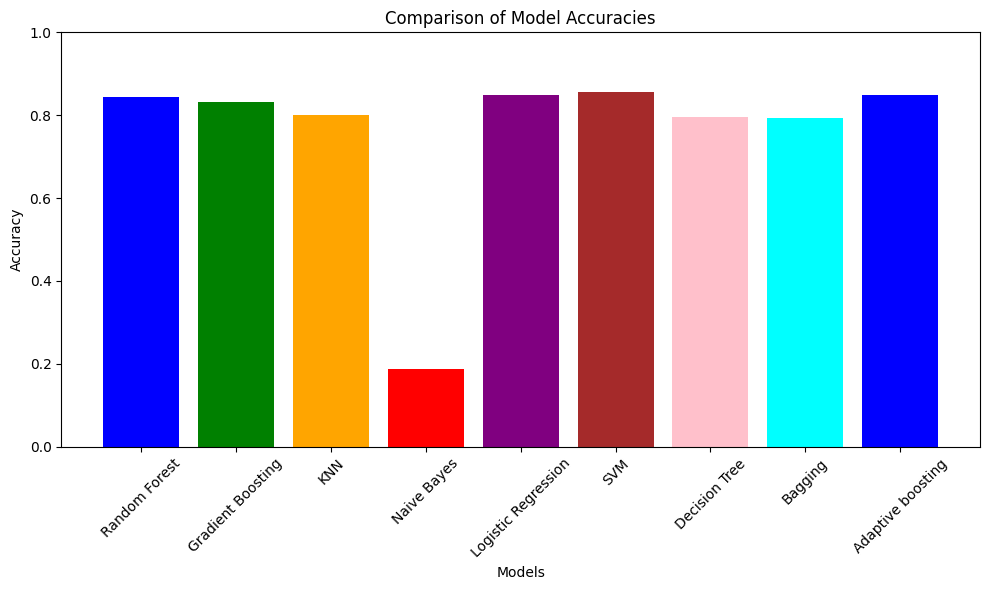

In [99]:
#model names and their accuracies
model_names = ['Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Adaptive boosting']
accuracies = [rf_accuracy, gb_accuracy, knn_accuracy, nb_accuracy, log_reg_accuracy, svm_accuracy, dt_accuracy, mean_bagging_accuracy, ada_accuracy]

plot.figure(figsize=(10, 6))
plot.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan'])
plot.xlabel('Models')
plot.ylabel('Accuracy')
plot.title('Comparison of Model Accuracies')
plot.ylim(0, 1)  #y-axis limit to ensure proper visualization of accuracy values
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

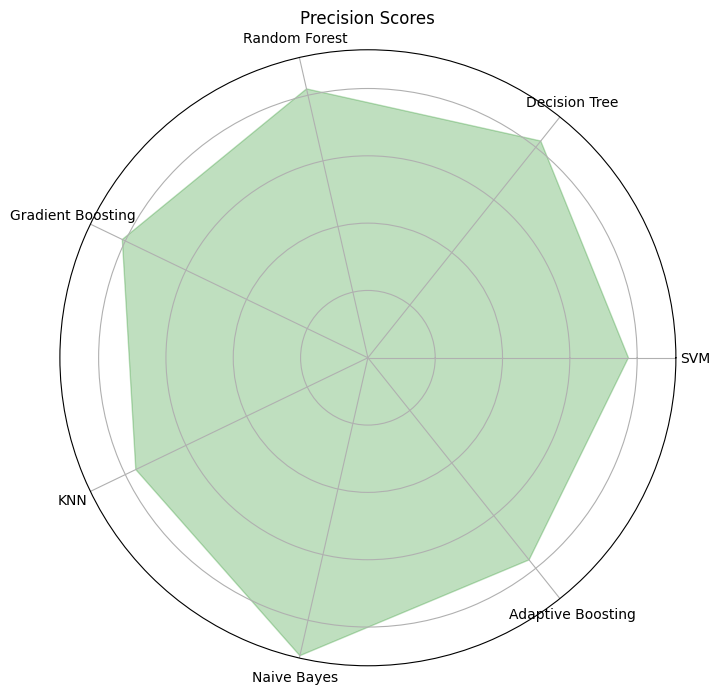

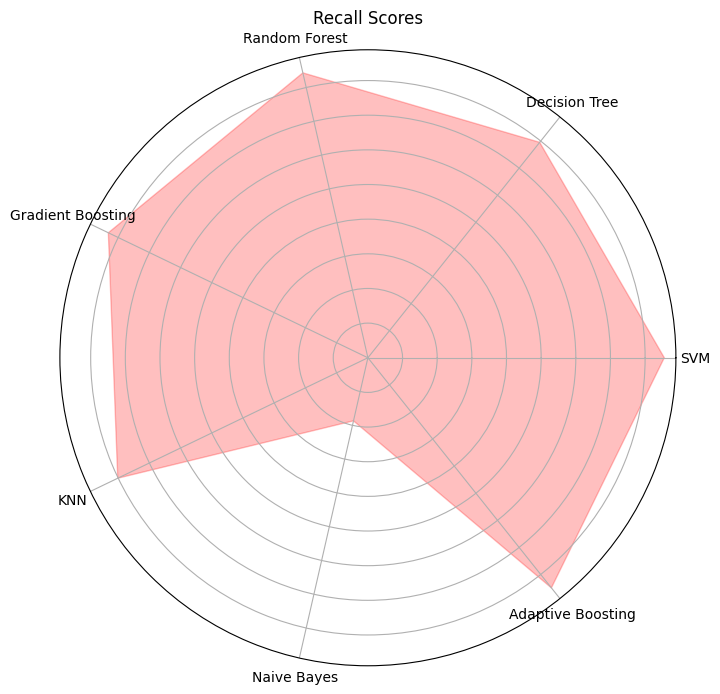

In [100]:
from sklearn.metrics import precision_score, recall_score

#precision scores
precision_scores = [precision_score(y_test, svm_pred, average='weighted', zero_division=0),
                    precision_score(y_test, dt_pred, average='weighted', zero_division=0),
                    precision_score(y_test, rf_pred, average='weighted', zero_division=0),
                    precision_score(y_test, gb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, knn_pred, average='weighted', zero_division=0),
                    precision_score(y_test, nb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)]
#recall scores
recall_scores = [recall_score(y_test, svm_pred, average='weighted', zero_division=0),
                 recall_score(y_test, dt_pred, average='weighted', zero_division=0),
                 recall_score(y_test, rf_pred, average='weighted', zero_division=0),
                 recall_score(y_test, gb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, knn_pred, average='weighted', zero_division=0),
                 recall_score(y_test, nb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, y_pred_ada, average='weighted', zero_division=0)]


#models
models = ['SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Adaptive Boosting']
num_models = len(models)

#angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_models, endpoint=False).tolist()

#radar chart is circular, so we need to "complete the loop" and append the start
precision_scores += precision_scores[:1]
recall_scores += recall_scores[:1]
angles += angles[:1]

#radar chart for precision
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, precision_scores, color='green', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Precision Scores')
plot.show()

#radar chart for recall
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, recall_scores, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Recall Scores')
plot.show()

In [101]:
from tabulate import tabulate

#data for table
data = [
    ["Logistic Regression", log_reg_accuracy],
    ["SVM", svm_accuracy],
    ["Decision Tree", dt_accuracy],
    ["Random Forest", rf_accuracy],
    ["Gradient Boosting", gb_accuracy],
    ["KNN", knn_accuracy],
    ["Naive Bayes", nb_accuracy],
    ["Bagging", mean_bagging_accuracy],
    ["Adaptive Boosting", ada_accuracy]
]

print(tabulate(data, headers=["Model", "Accuracy"]))

Model                  Accuracy
-------------------  ----------
Logistic Regression    0.849398
SVM                    0.855422
Decision Tree          0.795181
Random Forest          0.843373
Gradient Boosting      0.831325
KNN                    0.801205
Naive Bayes            0.186747
Bagging                0.793976
Adaptive Boosting      0.849398


# **Improvement level prediction - Anxiety for Song 3**


In [102]:
df_survey = df_survey.dropna()
columns_to_keep = ['Gender_Female','Gender_Male', 'Age', 'Listening_Frequency_s3', 'Anxiety_Level_Before_s3', 'Listening_conditions_s3_At Work', 'Listening_conditions_s3_During chores', 'Listening_conditions_s3_Sitting Alone', 'Listening_conditions_s3_Travelling']
X = df_survey[columns_to_keep]

In [103]:
#df_survey.info()

min_value = df_survey['Anxiety_Level_Improvement_s3'].min()
max_value = df_survey['Anxiety_Level_Improvement_s3'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: -2.4
Maximum value: 5.4


In [104]:
#define the bins and labels for categorization
bins = [-3, -1, 0, 1, 3, 5, 6]
labels = ['Moderate Decrease','Slight Decrease', 'Slight Increase','Moderate increase','High Increase', 'Very High Increase']

#create a new column with categorical labels based on the binning
df_survey['Anxiety_Level_Improvement_Category'] = pd.cut(df_survey['Anxiety_Level_Improvement_s3'], bins=bins, labels=labels)

#drop the original continuous column if no longer need
# df.drop(columns=['Anxiety_Level_Improvement_s3'], inplace=True)

print(df_survey[['Anxiety_Level_Improvement_s3', 'Anxiety_Level_Improvement_Category']].head())

y = df_survey['Anxiety_Level_Improvement_Category']


   Anxiety_Level_Improvement_s3 Anxiety_Level_Improvement_Category
0                           1.4                  Moderate increase
1                           2.4                  Moderate increase
2                           0.3                    Slight Increase
3                           0.2                    Slight Increase
4                          -0.5                    Slight Decrease


In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiate StandardScaler
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation to  test data
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score

#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

#SVM
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#Decision Tree
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.891566265060241
SVM Accuracy: 0.8674698795180723
Decision Tree Accuracy: 0.8192771084337349


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

#train models
random_forest.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)


rf_pred = random_forest.predict(X_test_scaled)
gb_pred = gradient_boosting.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = naive_bayes.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)


print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.891566265060241
Gradient Boosting Accuracy: 0.8734939759036144
KNN Accuracy: 0.8614457831325302
Naive Bayes Accuracy: 0.463855421686747


In [107]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

#number of base classifiers (trees) in ensemble
num_base_classifiers = 5

#define classifiers
classifiers = [DecisionTreeClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]

#initialize list to store bagging classifiers
bagging_classifiers = []


for _ in range(num_base_classifiers):
    #create a bootstrap sample (subset with replacement) from training data
    X_boot, y_boot = resample(X_train_scaled, y_train, random_state=42)
    base_classifiers = []

    #initialize and train each classifier on bootstrap sample
    for classifier in classifiers:
        base_classifier = classifier
        base_classifier.fit(X_boot, y_boot)

        #add  trained base classifier to list
        base_classifiers.append(base_classifier)
    #initialize bagging classifier with base classifiers
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=num_base_classifiers)

    #trai bagging classifier
    bagging_classifier.fit(X_train_scaled, y_train)

    #add trained bagging classifier to list
    bagging_classifiers.append(bagging_classifier)

accuracies = []
#make predictions using each bagging classifier
for bagging_classifier in bagging_classifiers:
    predictions = bagging_classifier.predict(X_test_scaled)

    # accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)

#mean accuracy
mean_bagging_accuracy = np.mean(accuracies)
print("Mean Accuracy across Bagging Classifiers:", mean_bagging_accuracy)


Accuracy: 0.8493975903614458
Accuracy: 0.8433734939759037
Accuracy: 0.8493975903614458
Accuracy: 0.8554216867469879
Accuracy: 0.8433734939759037
Mean Accuracy across Bagging Classifiers: 0.8481927710843374


In [108]:
#adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

#initialize base estimators(classifiers)
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1)),
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC(kernel='linear'))
]

#initialize individual AdaBoost classifiers for each base estimator
ada_boost_estimators = [
    AdaBoostClassifier(base_estimator=estimator[1], n_estimators=50, learning_rate=1.0, random_state=42)
    for estimator in base_estimators
]

#combine AdaBoost classifiers using VotingClassifier
ada_boost = VotingClassifier(estimators=[(name, estimator) for name, estimator in base_estimators], voting='hard')

#train VotingClassifier
ada_boost.fit(X_train_scaled, y_train)

#predictions
y_pred_ada = ada_boost.predict(X_test_scaled)

#accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", ada_accuracy)

Accuracy: 0.891566265060241


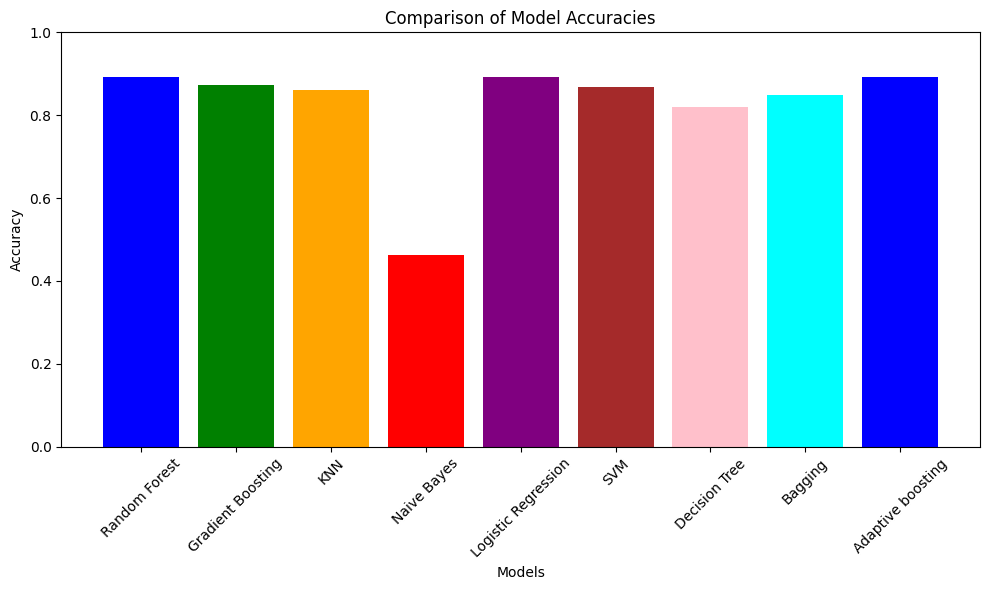

In [109]:
#model names and their accuracies
model_names = ['Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Adaptive boosting']
accuracies = [rf_accuracy, gb_accuracy, knn_accuracy, nb_accuracy, log_reg_accuracy, svm_accuracy, dt_accuracy, mean_bagging_accuracy, ada_accuracy]

plot.figure(figsize=(10, 6))
plot.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan'])
plot.xlabel('Models')
plot.ylabel('Accuracy')
plot.title('Comparison of Model Accuracies')
plot.ylim(0, 1)  #y-axis limit to ensure proper visualization of accuracy values
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

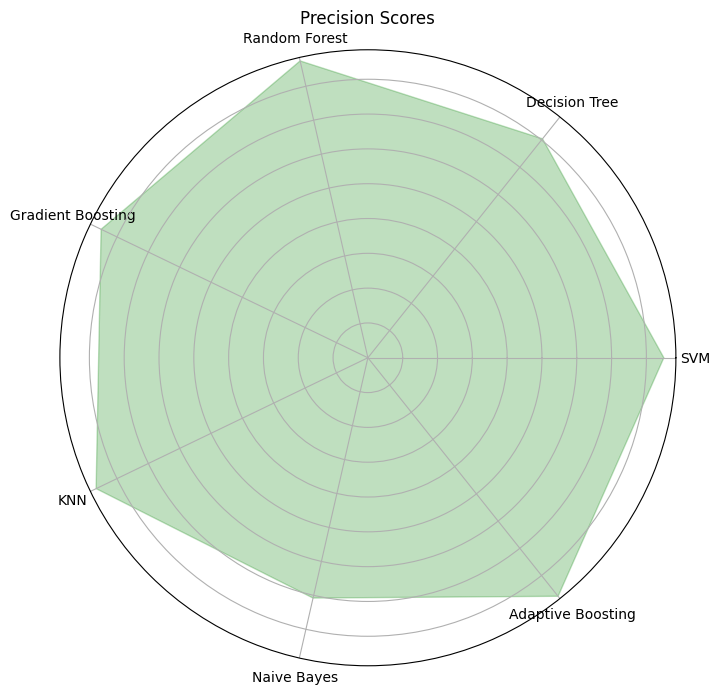

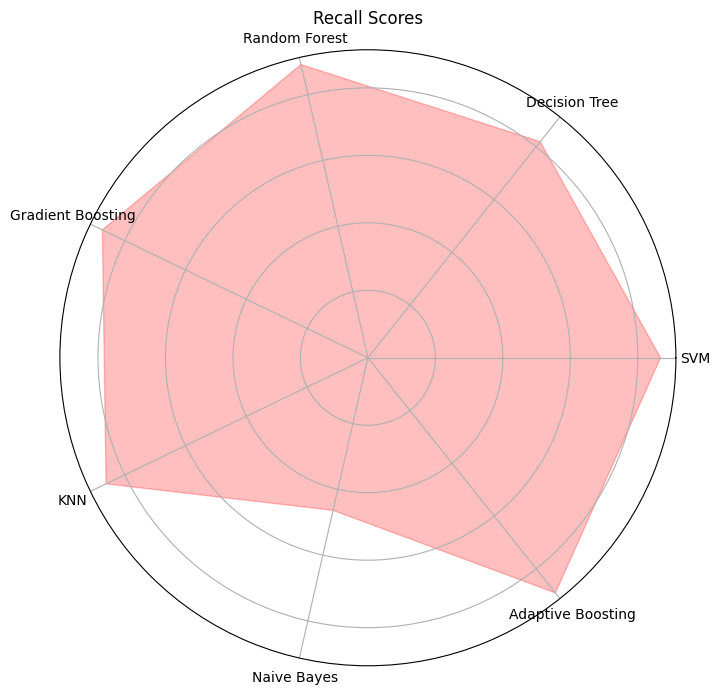

In [110]:
from sklearn.metrics import precision_score, recall_score

#precision scores
precision_scores = [precision_score(y_test, svm_pred, average='weighted', zero_division=0),
                    precision_score(y_test, dt_pred, average='weighted', zero_division=0),
                    precision_score(y_test, rf_pred, average='weighted', zero_division=0),
                    precision_score(y_test, gb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, knn_pred, average='weighted', zero_division=0),
                    precision_score(y_test, nb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)]
#recall scores
recall_scores = [recall_score(y_test, svm_pred, average='weighted'),
                 recall_score(y_test, dt_pred, average='weighted'),
                 recall_score(y_test, rf_pred, average='weighted'),
                 recall_score(y_test, gb_pred, average='weighted'),
                 recall_score(y_test, knn_pred, average='weighted'),
                 recall_score(y_test, nb_pred, average='weighted'),
                 recall_score(y_test, y_pred_ada, average='weighted')]


#models
models = ['SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Adaptive Boosting']
num_models = len(models)

#angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_models, endpoint=False).tolist()

#radar chart is circular, so we need to "complete the loop" and append the start
precision_scores += precision_scores[:1]
recall_scores += recall_scores[:1]
angles += angles[:1]

#radar chart for precision
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, precision_scores, color='green', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Precision Scores')
plot.show()

#radar chart for recall
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, recall_scores, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Recall Scores')
plot.show()

In [111]:
from tabulate import tabulate

#data for table
data = [
    ["Logistic Regression", log_reg_accuracy],
    ["SVM", svm_accuracy],
    ["Decision Tree", dt_accuracy],
    ["Random Forest", rf_accuracy],
    ["Gradient Boosting", gb_accuracy],
    ["KNN", knn_accuracy],
    ["Naive Bayes", nb_accuracy],
    ["Bagging", mean_bagging_accuracy],
    ["Adaptive Boosting", ada_accuracy]
]

print(tabulate(data, headers=["Model", "Accuracy"]))

Model                  Accuracy
-------------------  ----------
Logistic Regression    0.891566
SVM                    0.86747
Decision Tree          0.819277
Random Forest          0.891566
Gradient Boosting      0.873494
KNN                    0.861446
Naive Bayes            0.463855
Bagging                0.848193
Adaptive Boosting      0.891566


# **Improvement level prediction - Depression for Song 3**

In [112]:
df_survey = df_survey.dropna()
columns_to_keep = ['Gender_Female','Gender_Male', 'Age', 'Listening_Frequency_s3', 'Depression_Level_Before_s3', 'Listening_conditions_s3_At Work', 'Listening_conditions_s3_During chores', 'Listening_conditions_s3_Sitting Alone', 'Listening_conditions_s3_Travelling']
X = df_survey[columns_to_keep]

In [113]:
#df_survey.info()

min_value = df_survey['Depression_Level_Improvement_s3'].min()
max_value = df_survey['Depression_Level_Improvement_s3'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: -1.8
Maximum value: 4.0


In [114]:
#define the bins and labels for categorization
bins = [-3, -1, 0, 1, 3, 5, 6]
labels = ['Moderate Decrease','Slight Decrease', 'Slight Increase','Moderate increase','High Increase', 'Very High Increase']

#create a new column with categorical labels based on the binning
df_survey['Depression_Level_Improvement_Category'] = pd.cut(df_survey['Depression_Level_Improvement_s3'], bins=bins, labels=labels)

#drop the original continuous column if no longer need
# df.drop(columns=['Depression_Level_Improvement_s3'], inplace=True)

print(df_survey[['Depression_Level_Improvement_s3', 'Depression_Level_Improvement_Category']].head())

y = df_survey['Depression_Level_Improvement_Category']


   Depression_Level_Improvement_s3 Depression_Level_Improvement_Category
0                              2.8                     Moderate increase
1                              1.6                     Moderate increase
2                              0.3                       Slight Increase
3                              0.2                       Slight Increase
4                              0.5                       Slight Increase


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiate StandardScaler
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation to  test data
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score

#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

#SVM
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#Decision Tree
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.8373493975903614
SVM Accuracy: 0.8253012048192772
Decision Tree Accuracy: 0.7650602409638554


In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

#train models
random_forest.fit(X_train_scaled, y_train)
gradient_boosting.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)


rf_pred = random_forest.predict(X_test_scaled)
gb_pred = gradient_boosting.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = naive_bayes.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)


print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.7951807228915663
Gradient Boosting Accuracy: 0.7951807228915663
KNN Accuracy: 0.7951807228915663
Naive Bayes Accuracy: 0.6927710843373494


In [117]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

#number of base classifiers (trees) in ensemble
num_base_classifiers = 5

#define classifiers
classifiers = [DecisionTreeClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]

#initialize list to store bagging classifiers
bagging_classifiers = []


for _ in range(num_base_classifiers):
    #create a bootstrap sample (subset with replacement) from training data
    X_boot, y_boot = resample(X_train_scaled, y_train, random_state=42)
    base_classifiers = []

    #initialize and train each classifier on bootstrap sample
    for classifier in classifiers:
        base_classifier = classifier
        base_classifier.fit(X_boot, y_boot)

        #add  trained base classifier to list
        base_classifiers.append(base_classifier)
    #initialize bagging classifier with base classifiers
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=num_base_classifiers)

    #trai bagging classifier
    bagging_classifier.fit(X_train_scaled, y_train)

    #add trained bagging classifier to list
    bagging_classifiers.append(bagging_classifier)

accuracies = []
#make predictions using each bagging classifier
for bagging_classifier in bagging_classifiers:
    predictions = bagging_classifier.predict(X_test_scaled)

    # accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)

#mean accuracy
mean_bagging_accuracy = np.mean(accuracies)
print("Mean Accuracy across Bagging Classifiers:", mean_bagging_accuracy)


Accuracy: 0.8132530120481928
Accuracy: 0.8072289156626506
Accuracy: 0.8253012048192772
Accuracy: 0.8072289156626506
Accuracy: 0.7891566265060241
Mean Accuracy across Bagging Classifiers: 0.8084337349397591


In [118]:
#adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

#initialize base estimators(classifiers)
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1)),
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC(kernel='linear'))
]

#initialize individual AdaBoost classifiers for each base estimator
ada_boost_estimators = [
    AdaBoostClassifier(base_estimator=estimator[1], n_estimators=50, learning_rate=1.0, random_state=42)
    for estimator in base_estimators
]

#combine AdaBoost classifiers using VotingClassifier
ada_boost = VotingClassifier(estimators=[(name, estimator) for name, estimator in base_estimators], voting='hard')

#train VotingClassifier
ada_boost.fit(X_train_scaled, y_train)

#predictions
y_pred_ada = ada_boost.predict(X_test_scaled)

#accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", ada_accuracy)

Accuracy: 0.8192771084337349


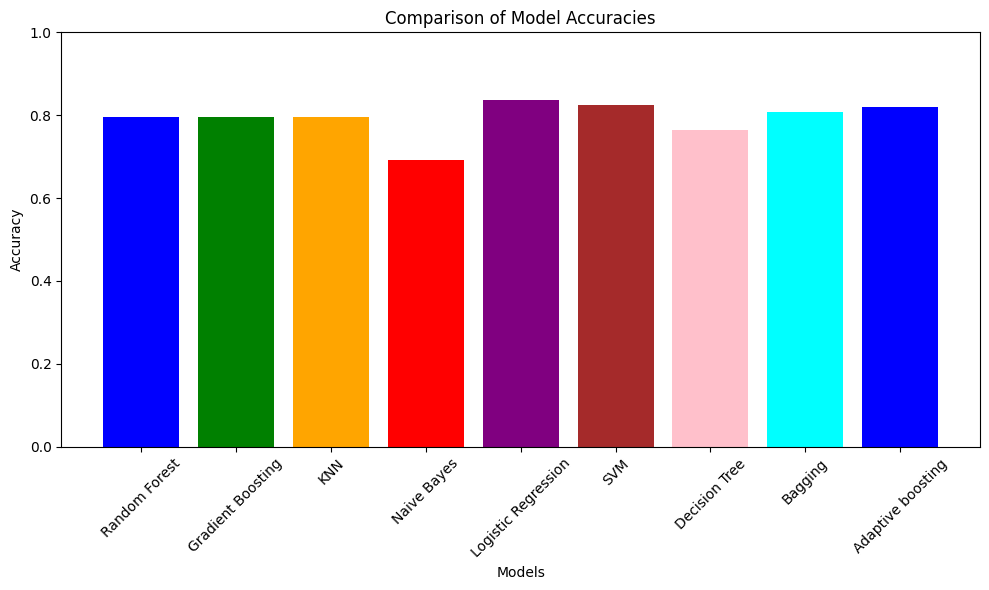

In [119]:
#model names and their accuracies
model_names = ['Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Adaptive boosting']
accuracies = [rf_accuracy, gb_accuracy, knn_accuracy, nb_accuracy, log_reg_accuracy, svm_accuracy, dt_accuracy, mean_bagging_accuracy, ada_accuracy]

plot.figure(figsize=(10, 6))
plot.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan'])
plot.xlabel('Models')
plot.ylabel('Accuracy')
plot.title('Comparison of Model Accuracies')
plot.ylim(0, 1)  #y-axis limit to ensure proper visualization of accuracy values
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

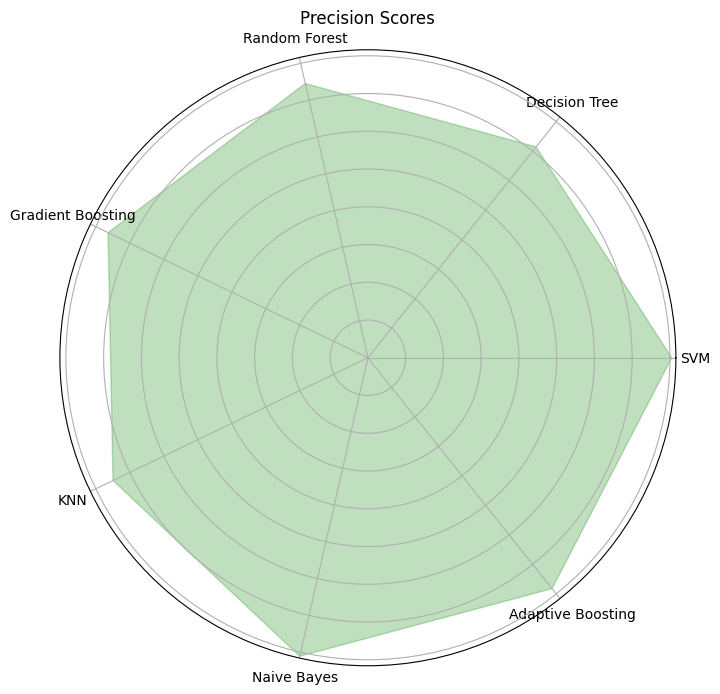

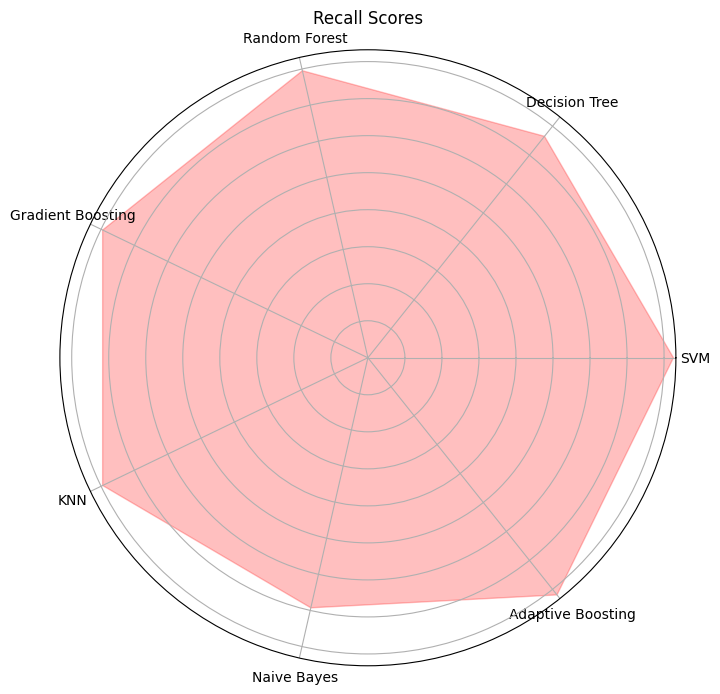

In [120]:
from sklearn.metrics import precision_score, recall_score

#precision scores
precision_scores = [precision_score(y_test, svm_pred, average='weighted', zero_division=0),
                    precision_score(y_test, dt_pred, average='weighted', zero_division=0),
                    precision_score(y_test, rf_pred, average='weighted', zero_division=0),
                    precision_score(y_test, gb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, knn_pred, average='weighted', zero_division=0),
                    precision_score(y_test, nb_pred, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)]
#recall scores
recall_scores = [recall_score(y_test, svm_pred, average='weighted', zero_division=0),
                 recall_score(y_test, dt_pred, average='weighted', zero_division=0),
                 recall_score(y_test, rf_pred, average='weighted', zero_division=0),
                 recall_score(y_test, gb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, knn_pred, average='weighted', zero_division=0),
                 recall_score(y_test, nb_pred, average='weighted', zero_division=0),
                 recall_score(y_test, y_pred_ada, average='weighted', zero_division=0)]


#models
models = ['SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Adaptive Boosting']
num_models = len(models)

#angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_models, endpoint=False).tolist()

#radar chart is circular, so we need to "complete the loop" and append the start
precision_scores += precision_scores[:1]
recall_scores += recall_scores[:1]
angles += angles[:1]

#radar chart for precision
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, precision_scores, color='green', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Precision Scores')
plot.show()

#radar chart for recall
fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, recall_scores, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

plot.title('Recall Scores')
plot.show()

In [121]:
from tabulate import tabulate

#data for table
data = [
    ["Logistic Regression", log_reg_accuracy],
    ["SVM", svm_accuracy],
    ["Decision Tree", dt_accuracy],
    ["Random Forest", rf_accuracy],
    ["Gradient Boosting", gb_accuracy],
    ["KNN", knn_accuracy],
    ["Naive Bayes", nb_accuracy],
    ["Bagging", mean_bagging_accuracy],
    ["Adaptive Boosting", ada_accuracy]
]

print(tabulate(data, headers=["Model", "Accuracy"]))

Model                  Accuracy
-------------------  ----------
Logistic Regression    0.837349
SVM                    0.825301
Decision Tree          0.76506
Random Forest          0.795181
Gradient Boosting      0.795181
KNN                    0.795181
Naive Bayes            0.692771
Bagging                0.808434
Adaptive Boosting      0.819277
